In [1]:
import kagglehub
# kagglehub.login()

In [2]:
import pathlib
import torch

import sentencepiece as spm
from recurrentgemma import torch as recurrentgemma

import pprint as pp

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'

device = "cuda" if torch.cuda.is_available() else "cpu"

In [3]:
VARIANT = '2b-it' # @param ['2b', '2b-it'] {type:"string"}
weights_dir = kagglehub.model_download(f'google/recurrentgemma/pyTorch/{VARIANT}')

weights_dir = pathlib.Path(weights_dir)
ckpt_path = weights_dir / f'{VARIANT}.pt'
vocab_path = weights_dir / 'tokenizer.model'

In [4]:
params = torch.load(str(ckpt_path))
params = {k : v.to(device=device) for k, v in params.items()}

In [5]:
model_config = recurrentgemma.GriffinConfig.from_torch_params(params)
model = recurrentgemma.Griffin(model_config, device=device, dtype=torch.bfloat16)
model.load_state_dict(params)

<All keys matched successfully>

In [6]:
model_config

GriffinConfig(vocab_size=256000, width=2560, mlp_expanded_width=7680, num_heads=10, block_types=(<TemporalBlockType.RECURRENT: 2>, <TemporalBlockType.RECURRENT: 2>, <TemporalBlockType.ATTENTION: 1>, <TemporalBlockType.RECURRENT: 2>, <TemporalBlockType.RECURRENT: 2>, <TemporalBlockType.ATTENTION: 1>, <TemporalBlockType.RECURRENT: 2>, <TemporalBlockType.RECURRENT: 2>, <TemporalBlockType.ATTENTION: 1>, <TemporalBlockType.RECURRENT: 2>, <TemporalBlockType.RECURRENT: 2>, <TemporalBlockType.ATTENTION: 1>, <TemporalBlockType.RECURRENT: 2>, <TemporalBlockType.RECURRENT: 2>, <TemporalBlockType.ATTENTION: 1>, <TemporalBlockType.RECURRENT: 2>, <TemporalBlockType.RECURRENT: 2>, <TemporalBlockType.ATTENTION: 1>, <TemporalBlockType.RECURRENT: 2>, <TemporalBlockType.RECURRENT: 2>, <TemporalBlockType.ATTENTION: 1>, <TemporalBlockType.RECURRENT: 2>, <TemporalBlockType.RECURRENT: 2>, <TemporalBlockType.ATTENTION: 1>, <TemporalBlockType.RECURRENT: 2>, <TemporalBlockType.RECURRENT: 2>), lru_width=2560, em

In [7]:
vocab = spm.SentencePieceProcessor()
vocab.Load(str(vocab_path))

True

In [8]:
sampler = recurrentgemma.Sampler(model=model, vocab=vocab)

next_tok= Morrison
recurrence =>


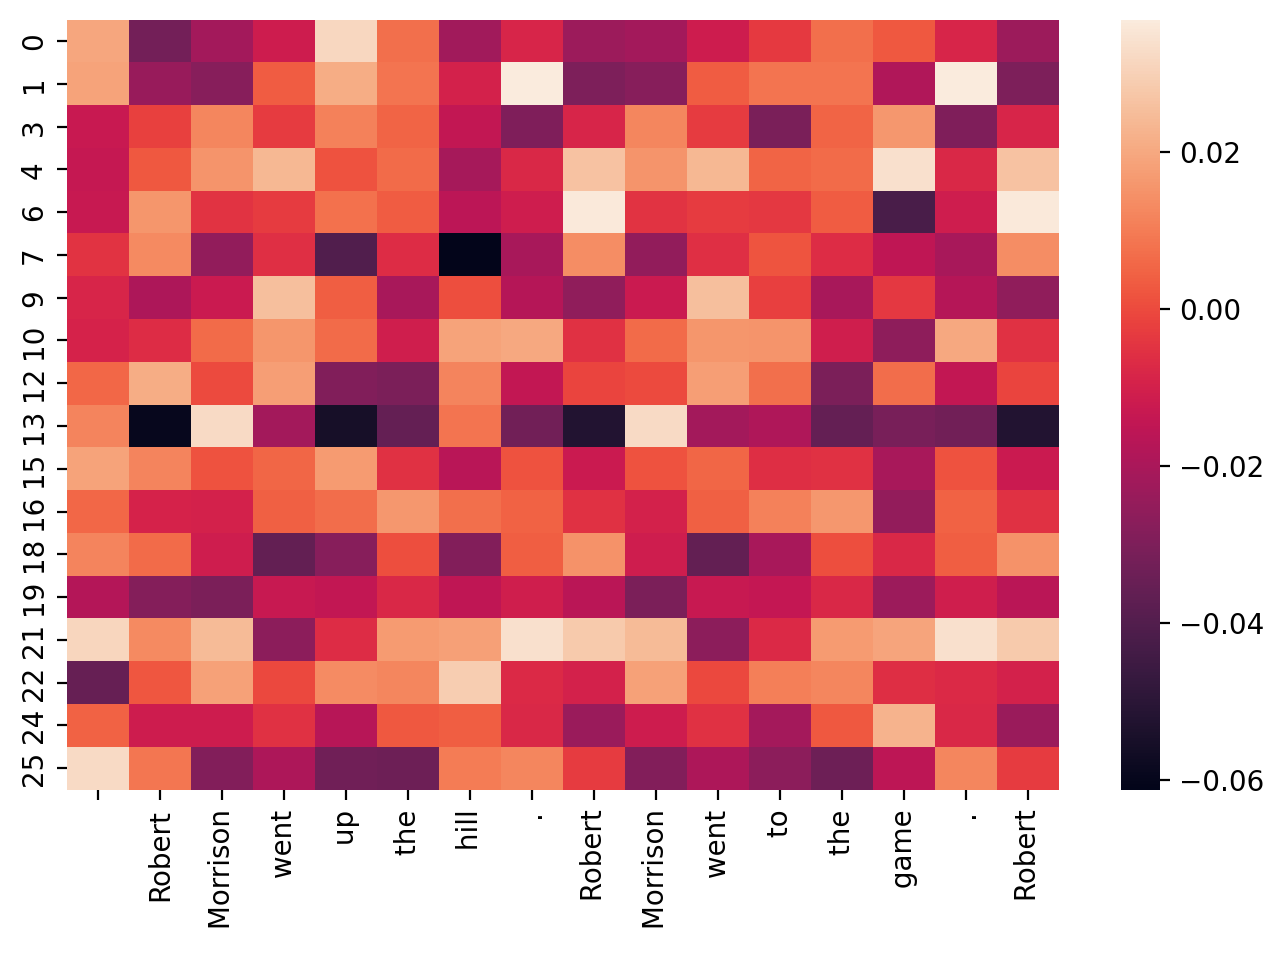

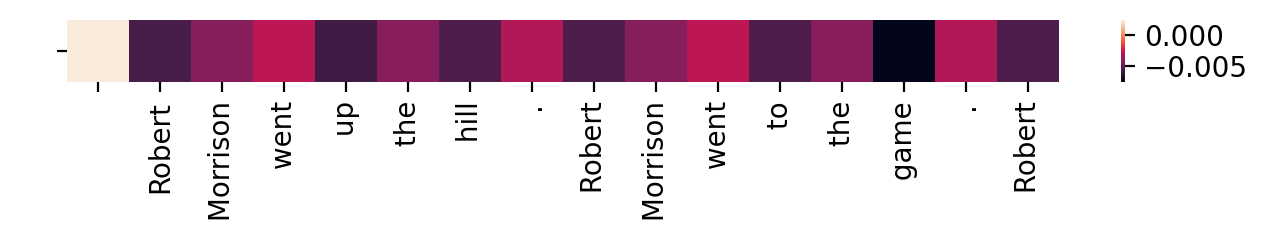

attn =>


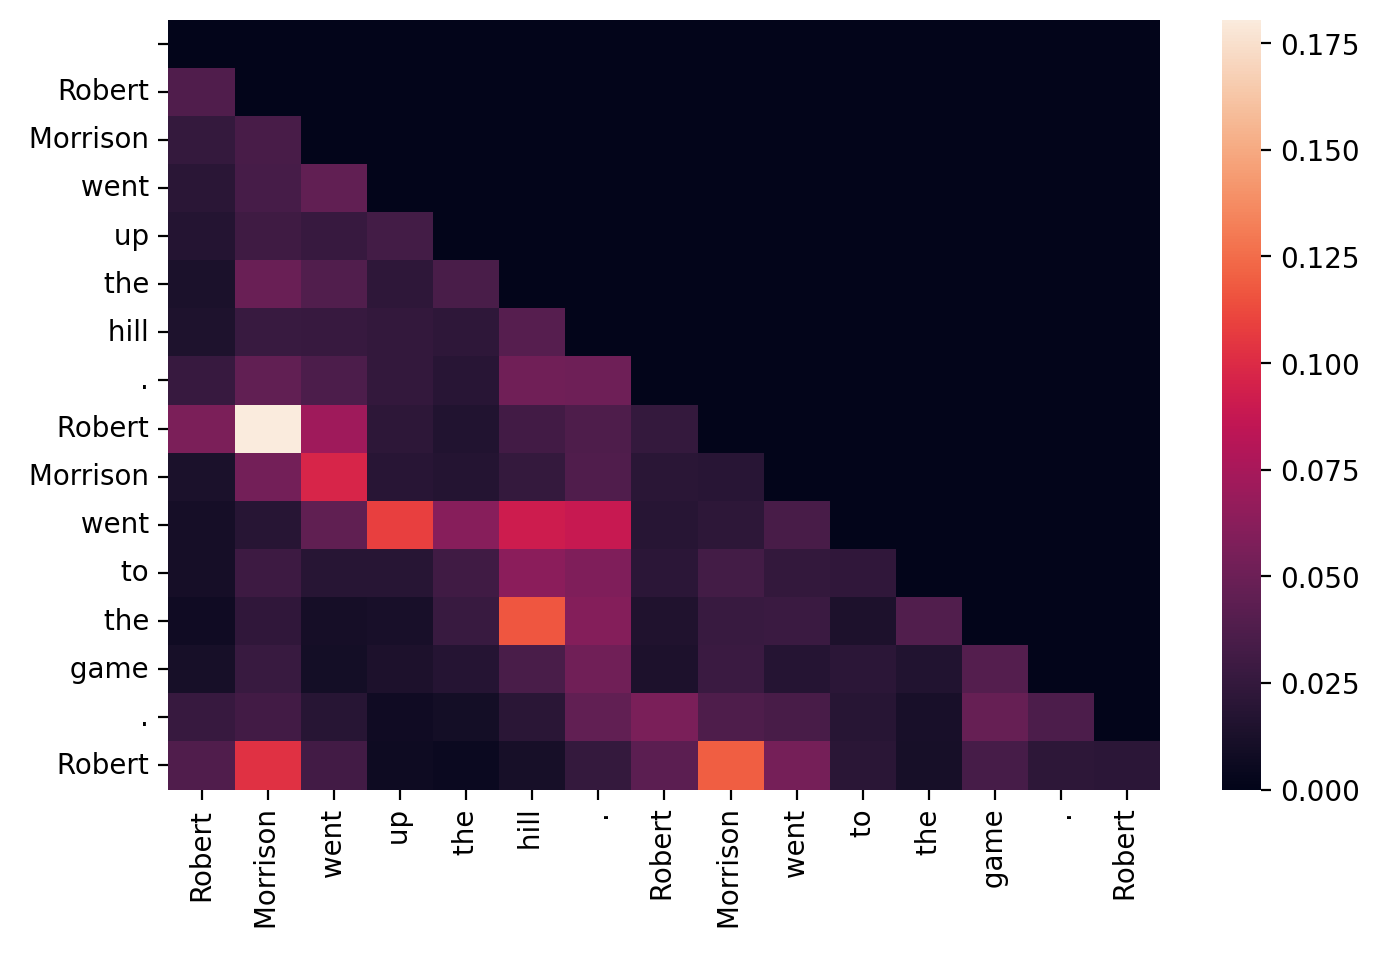


==END==

next_tok= scored
recurrence =>


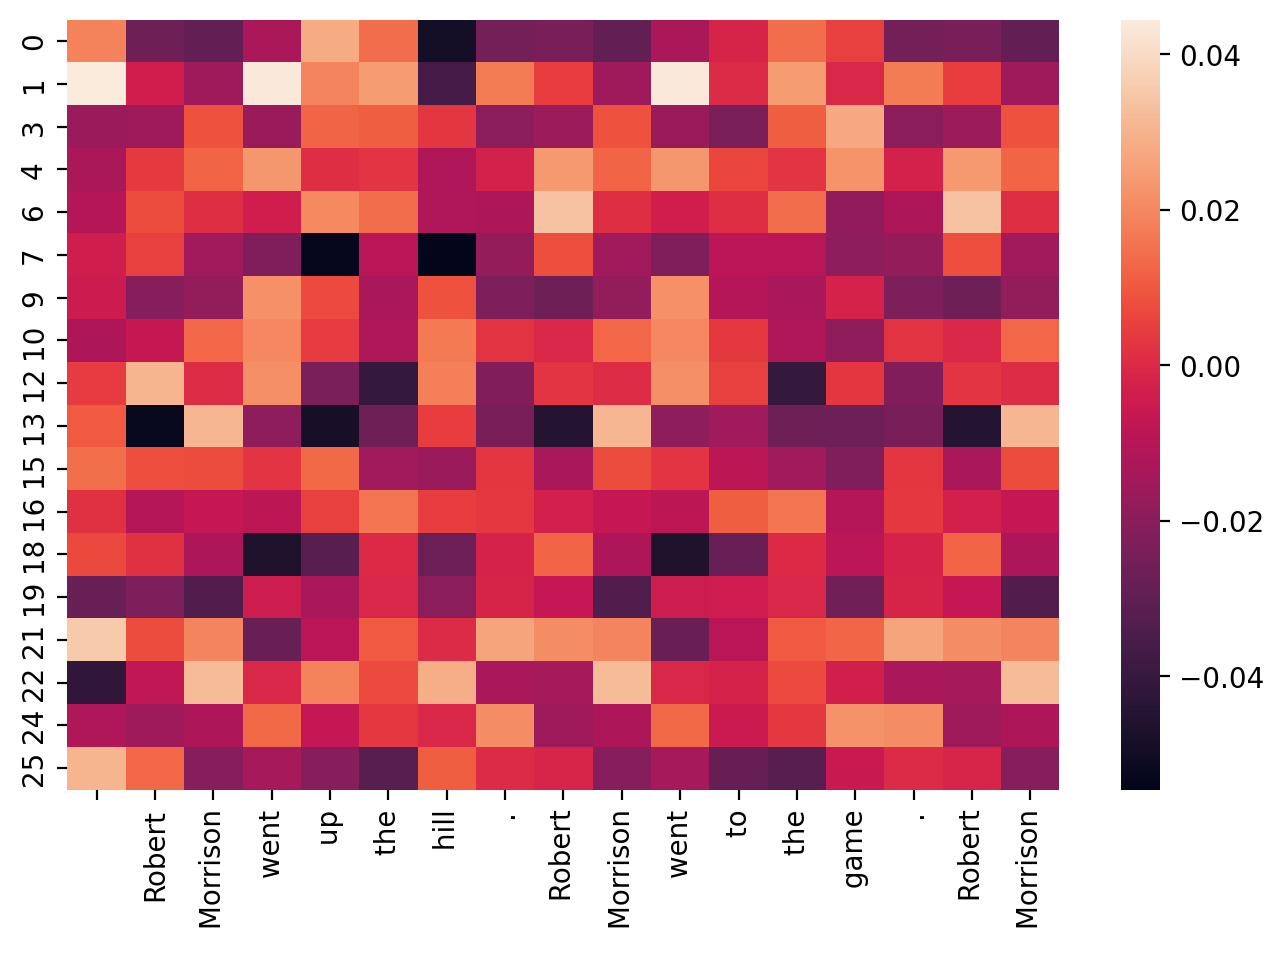

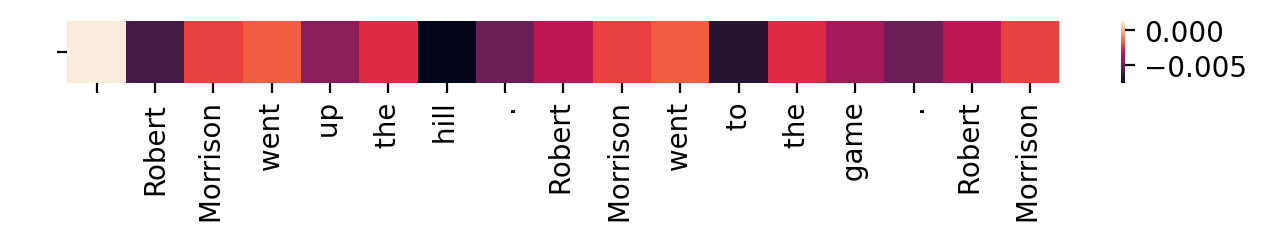

attn =>


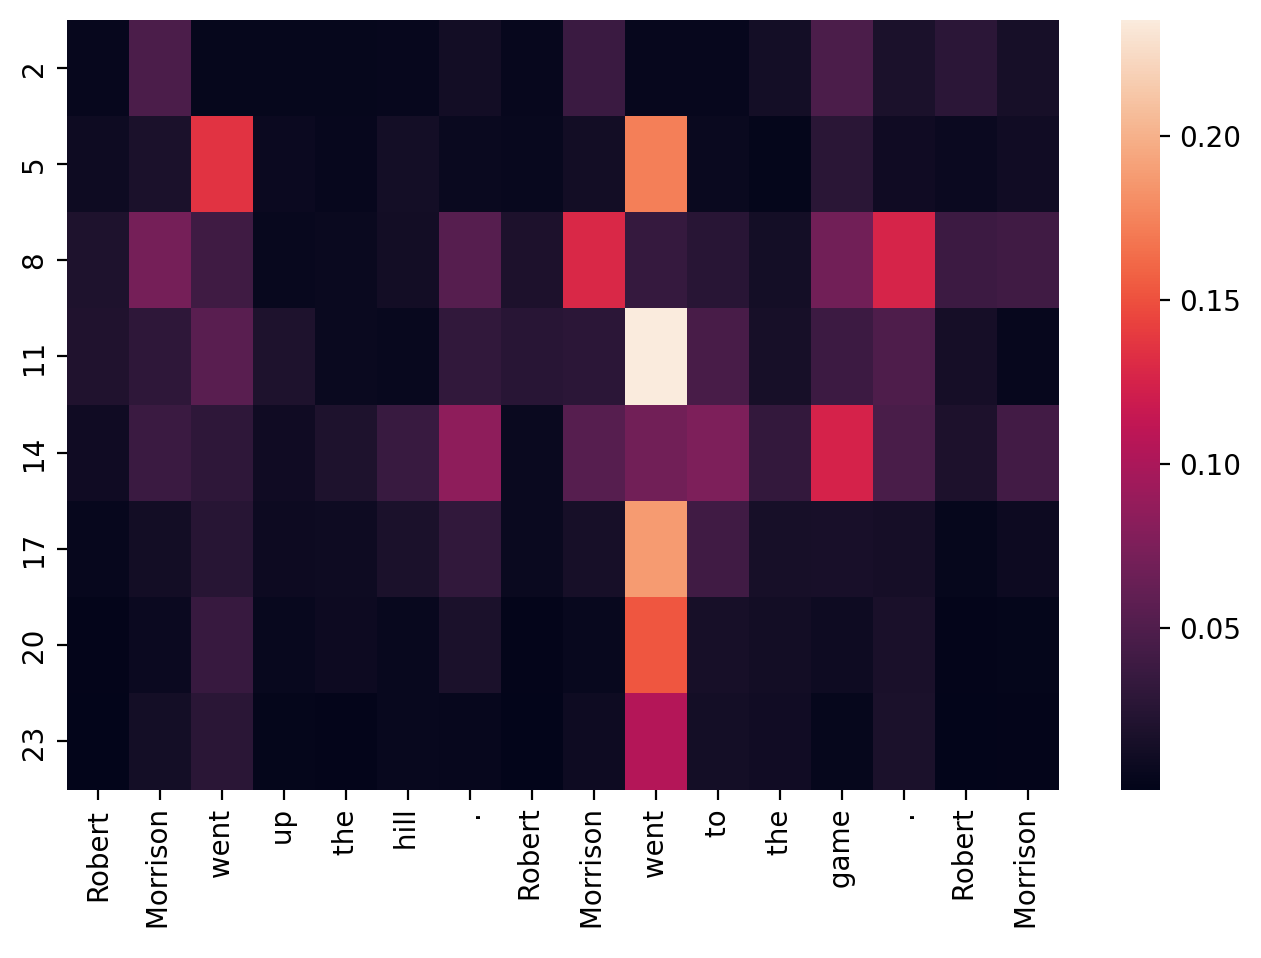

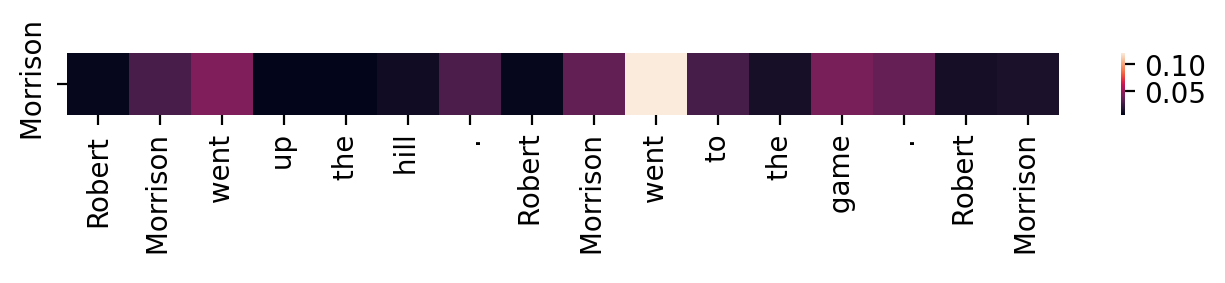


==END==

next_tok= a
recurrence =>


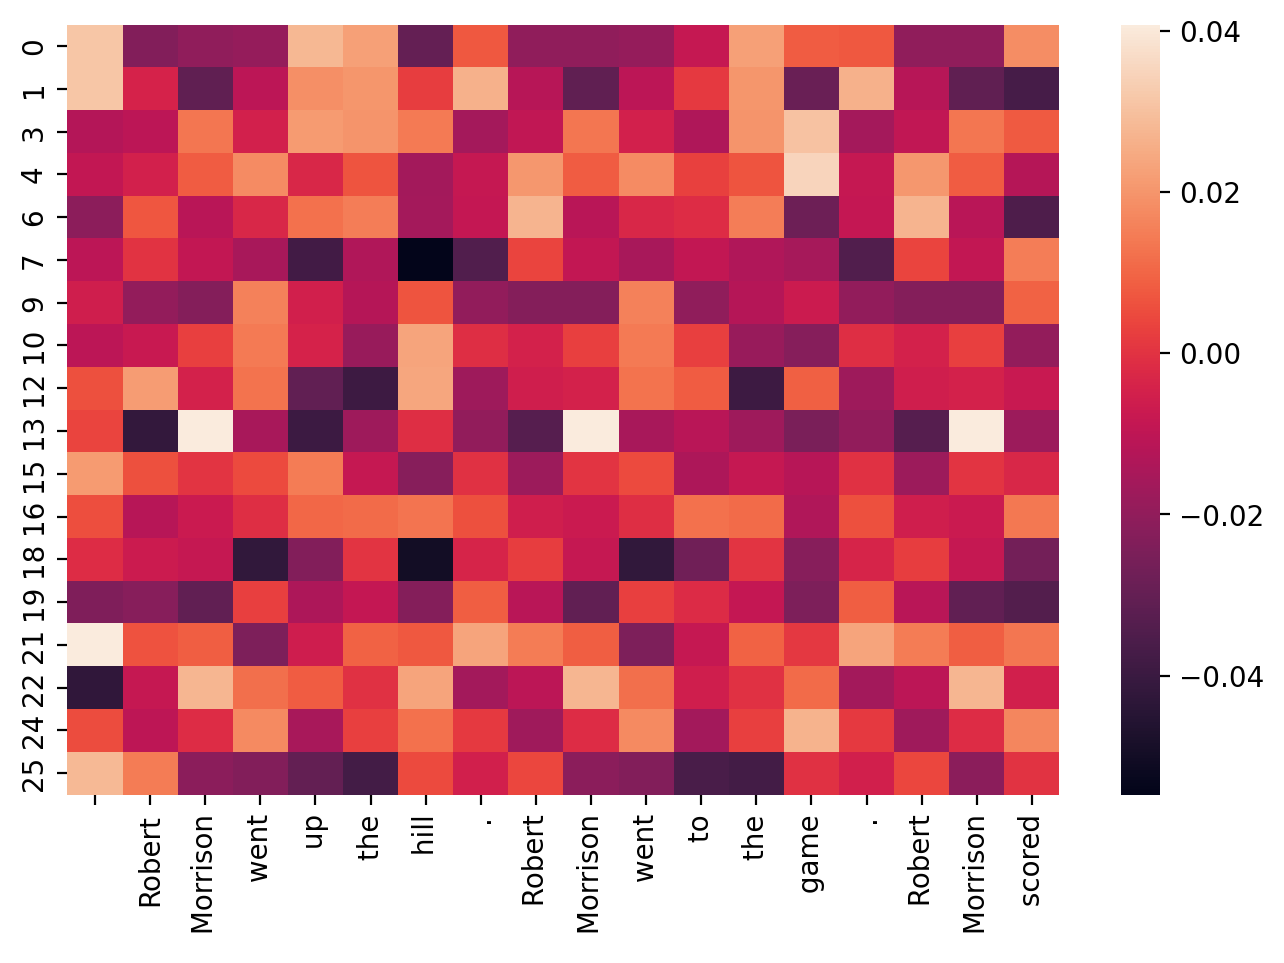

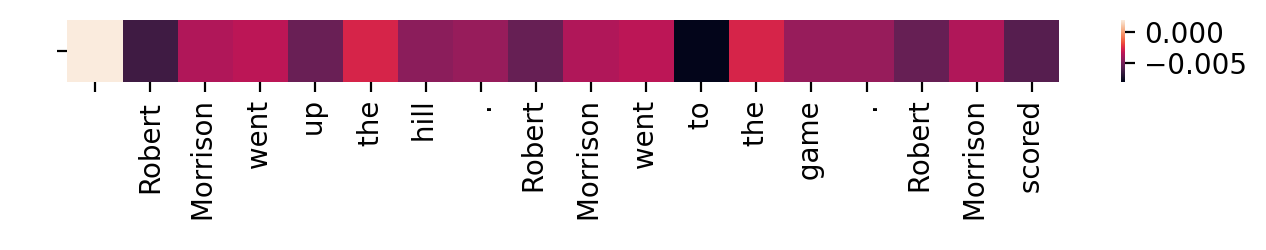

attn =>


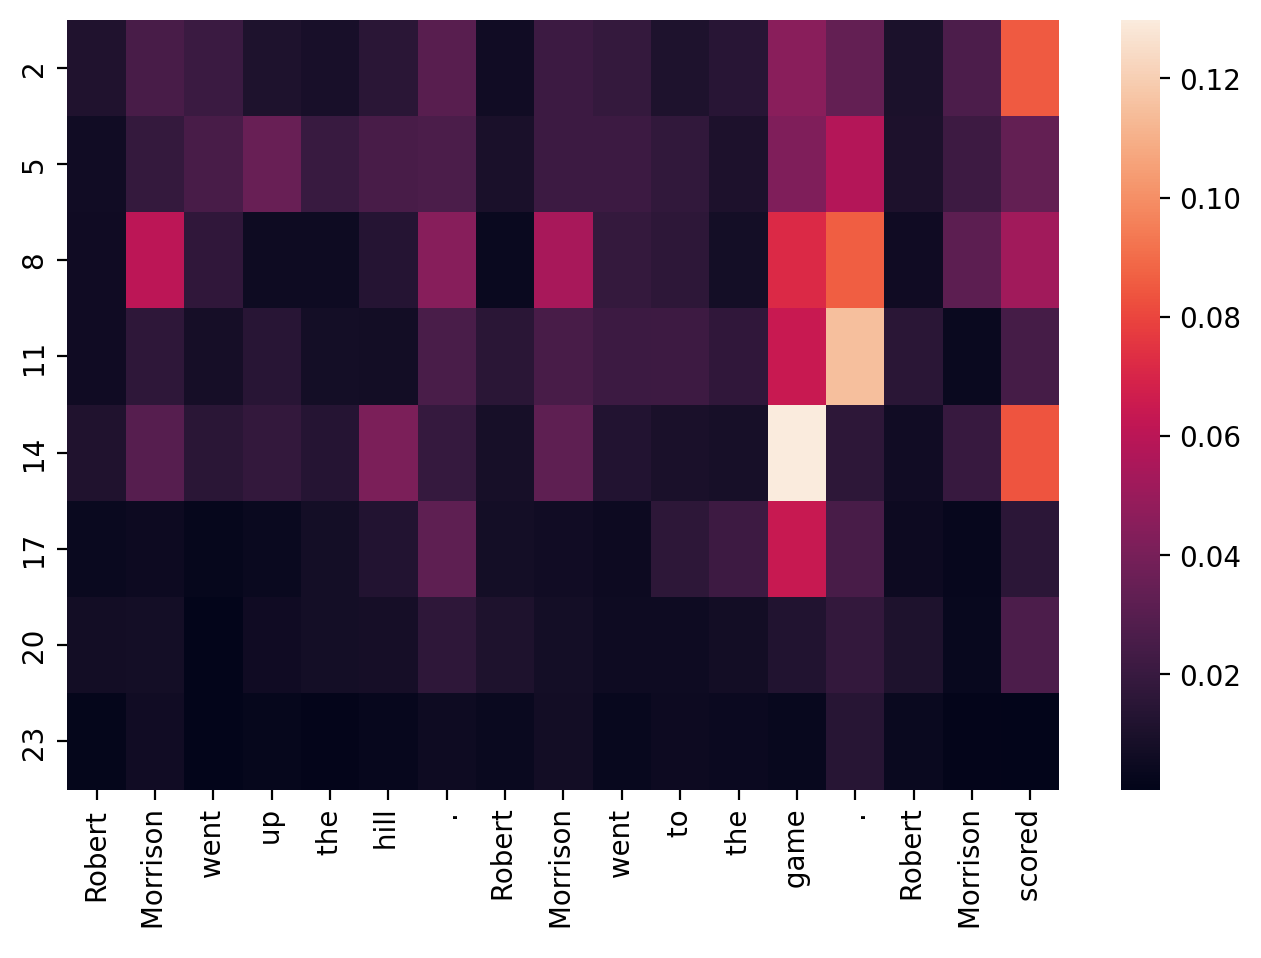

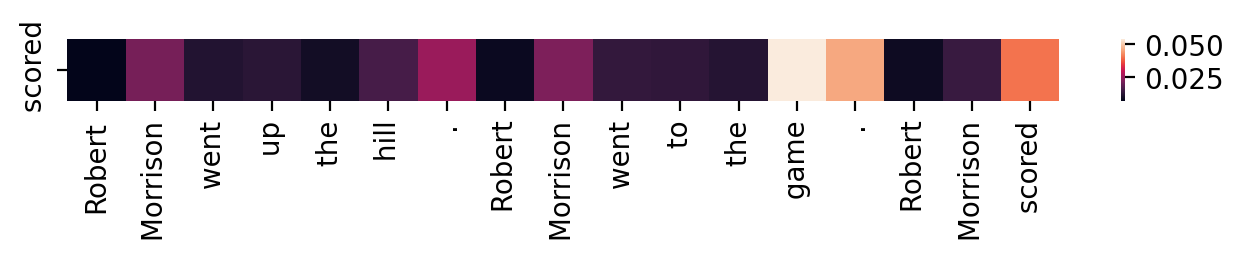


==END==

next_tok= touchdown
recurrence =>


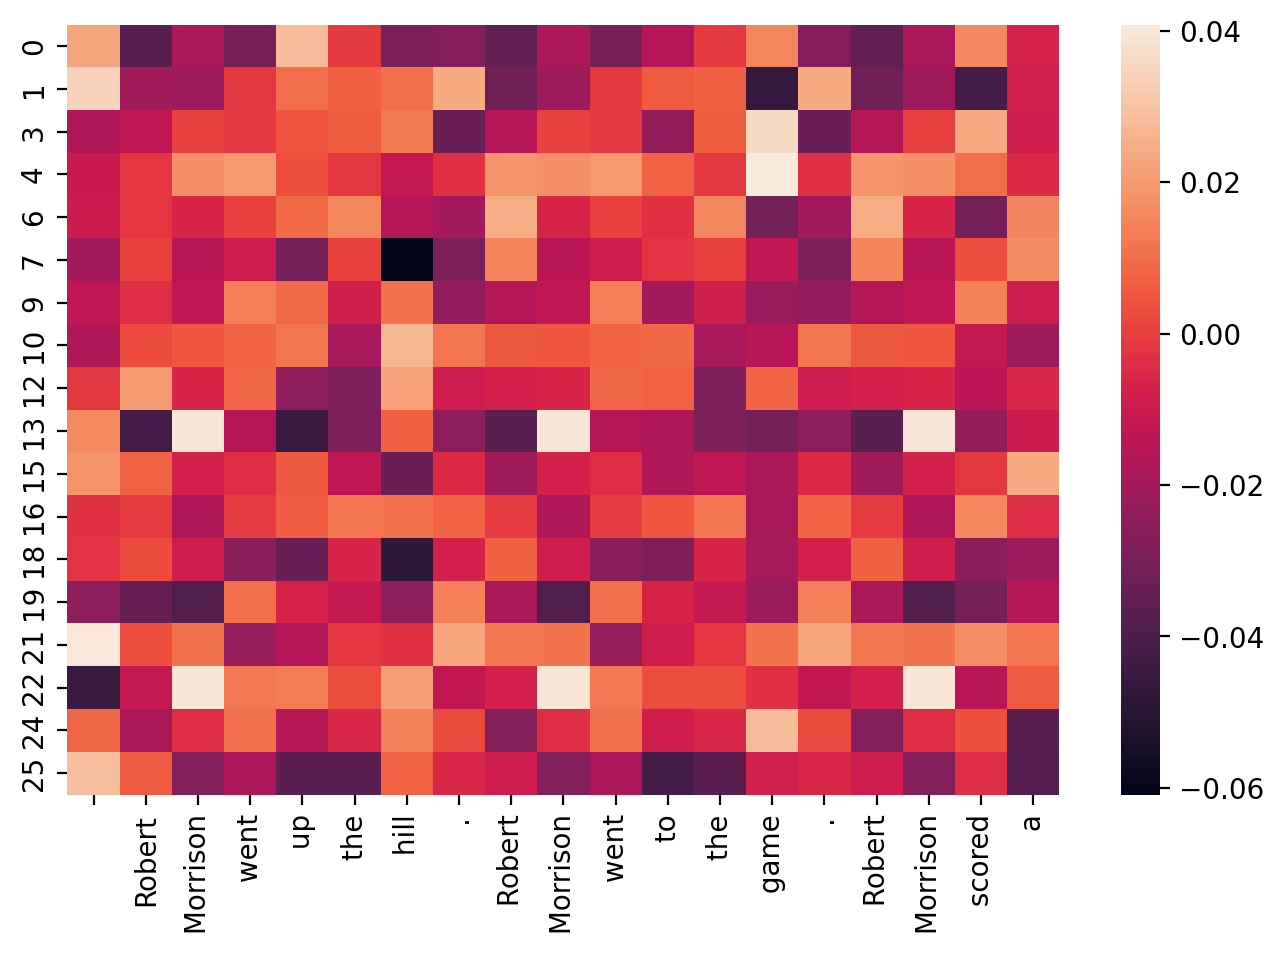

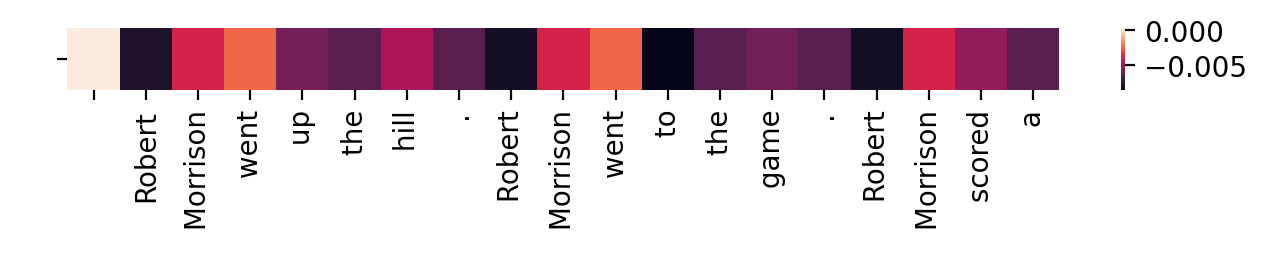

attn =>


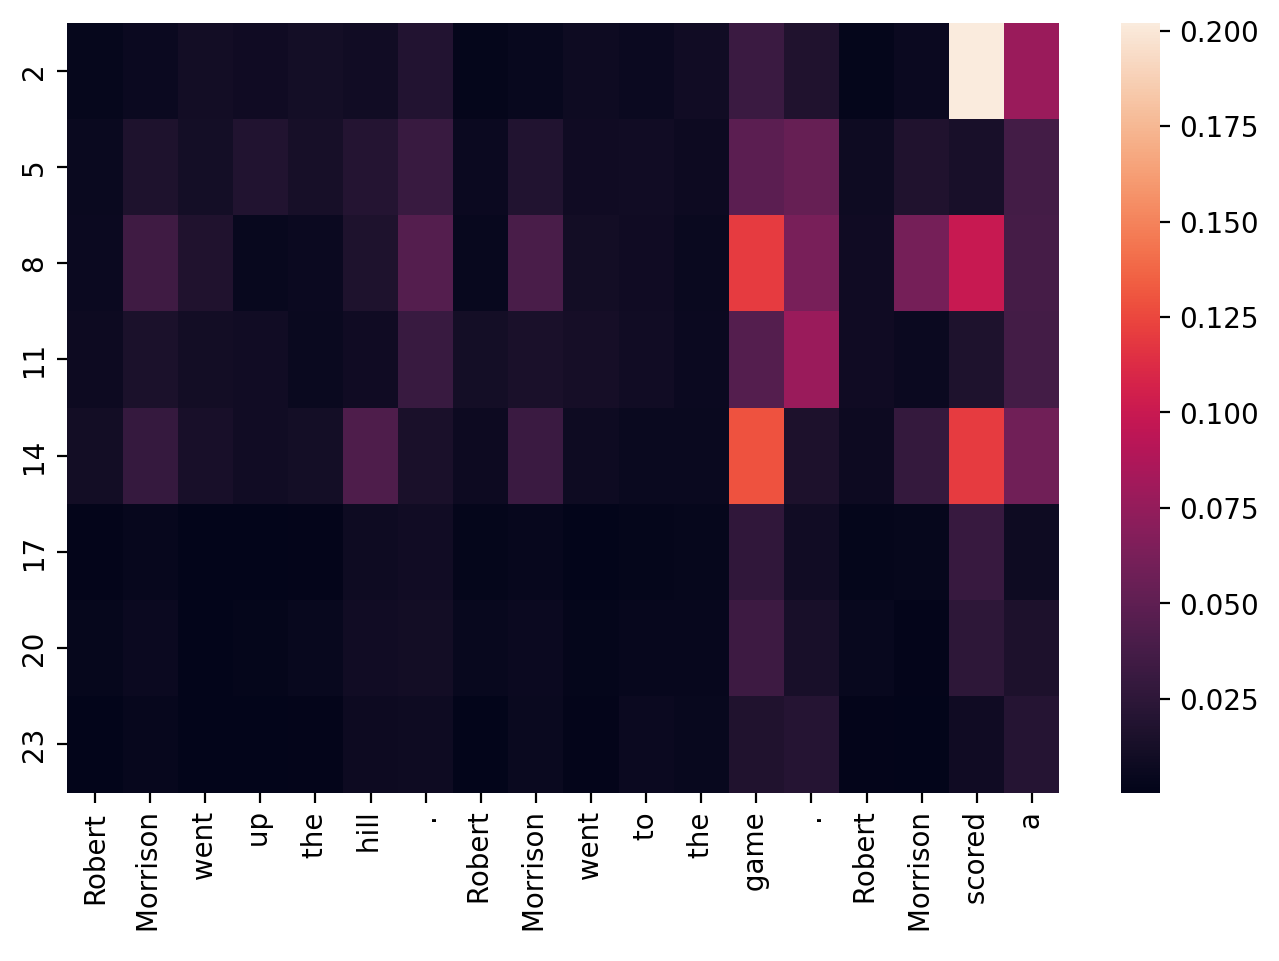

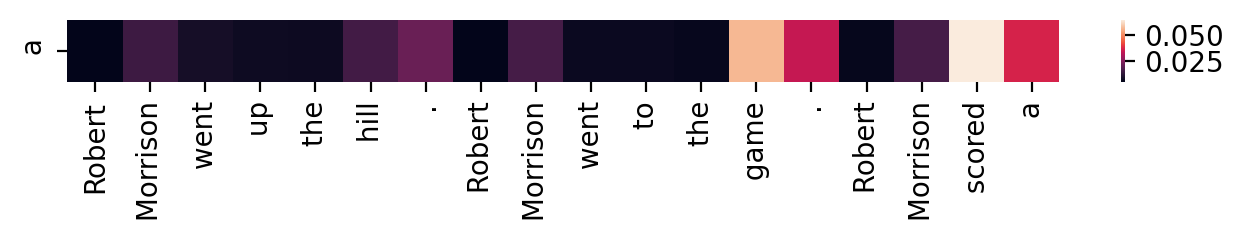


==END==

next_tok=.
recurrence =>


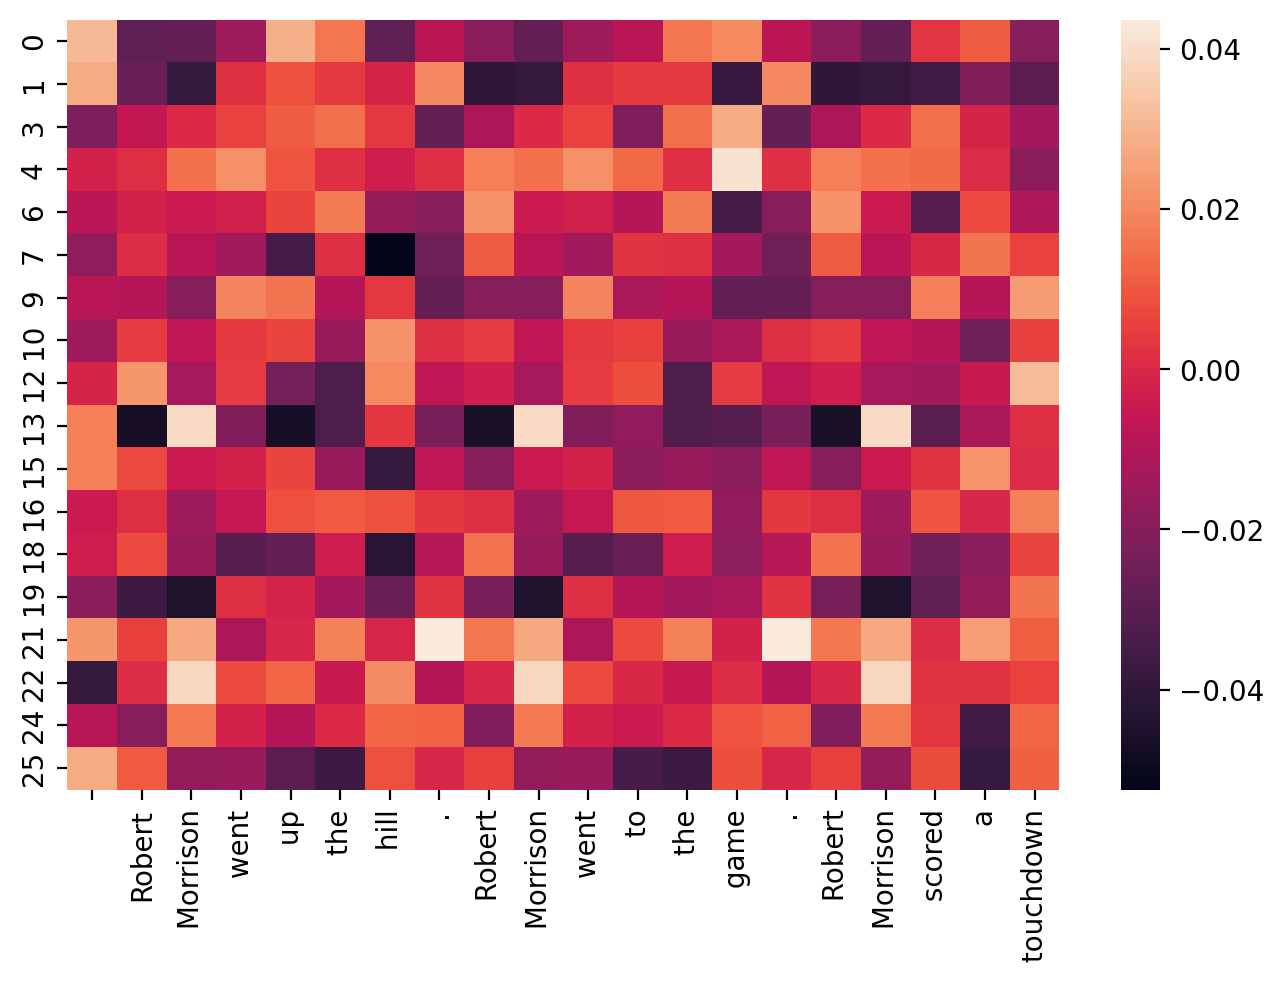

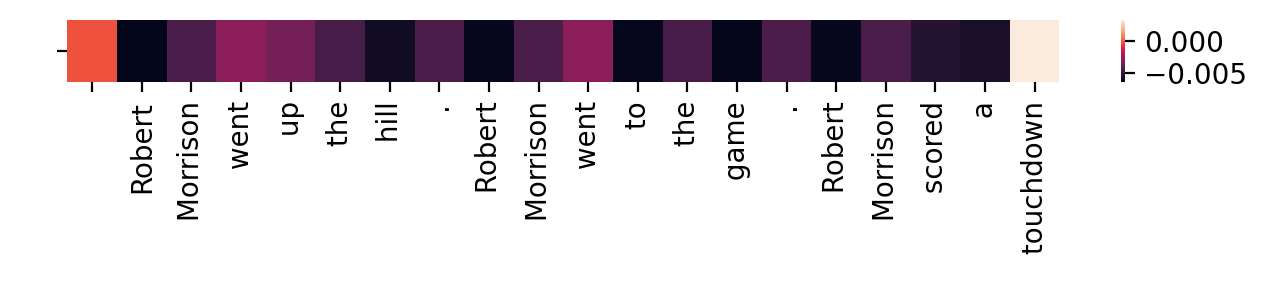

attn =>


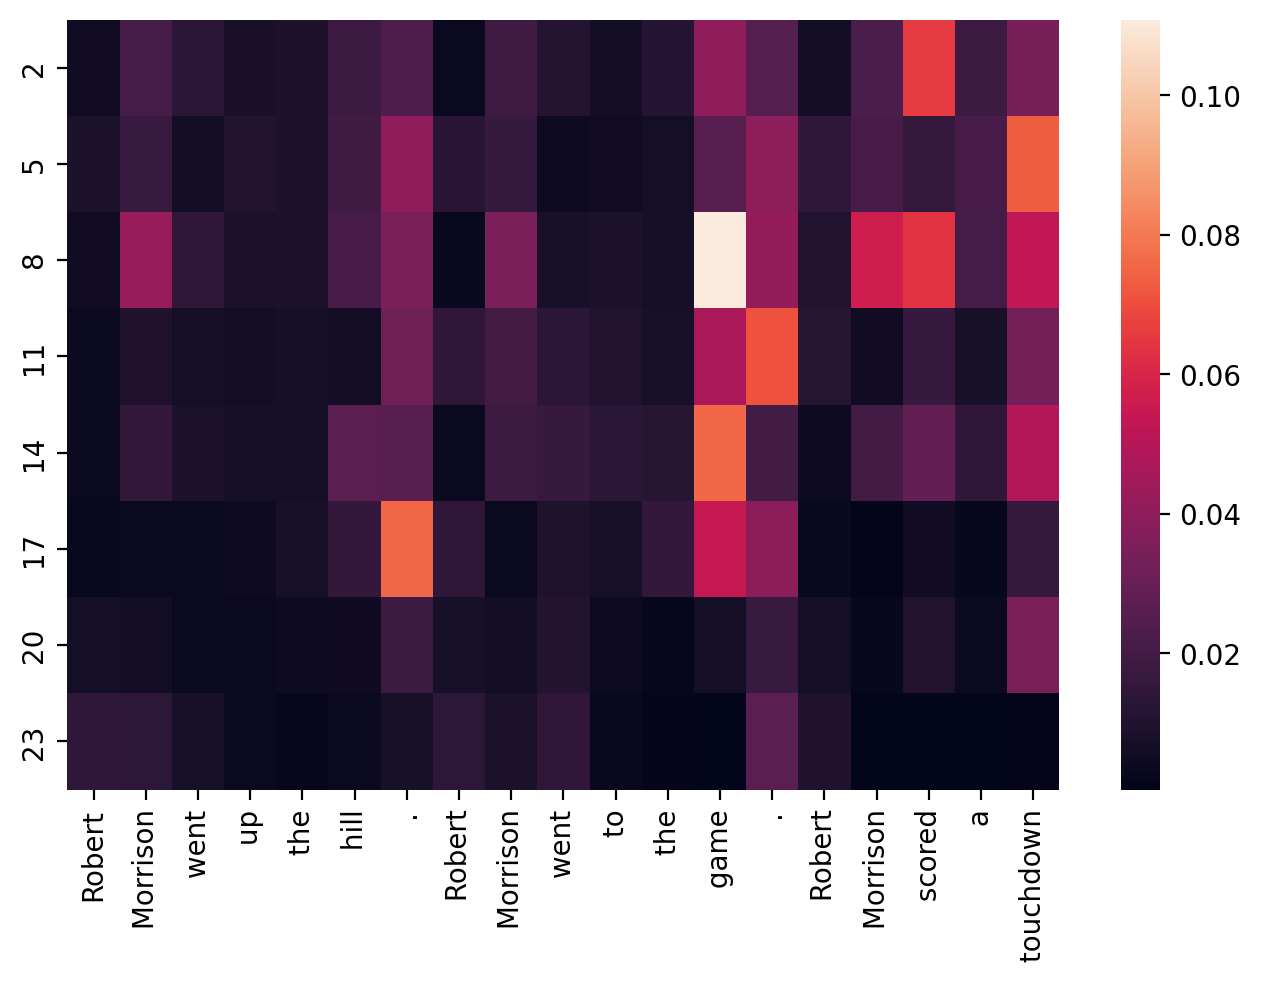

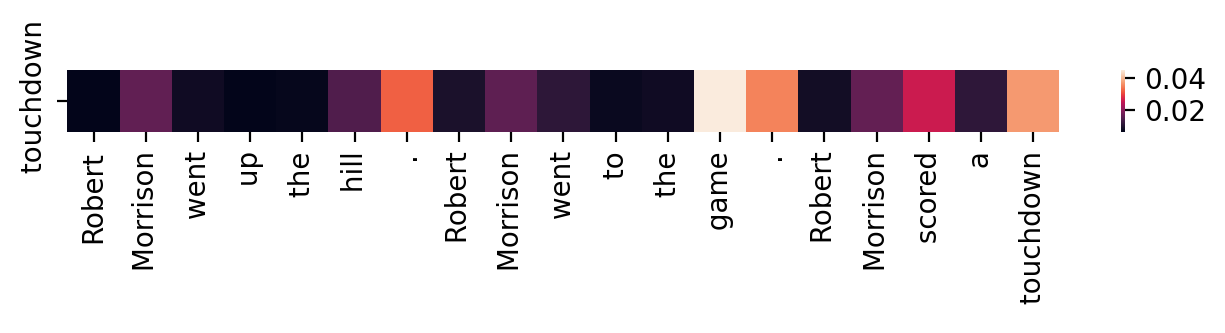


==END==

next_tok= Robert
recurrence =>


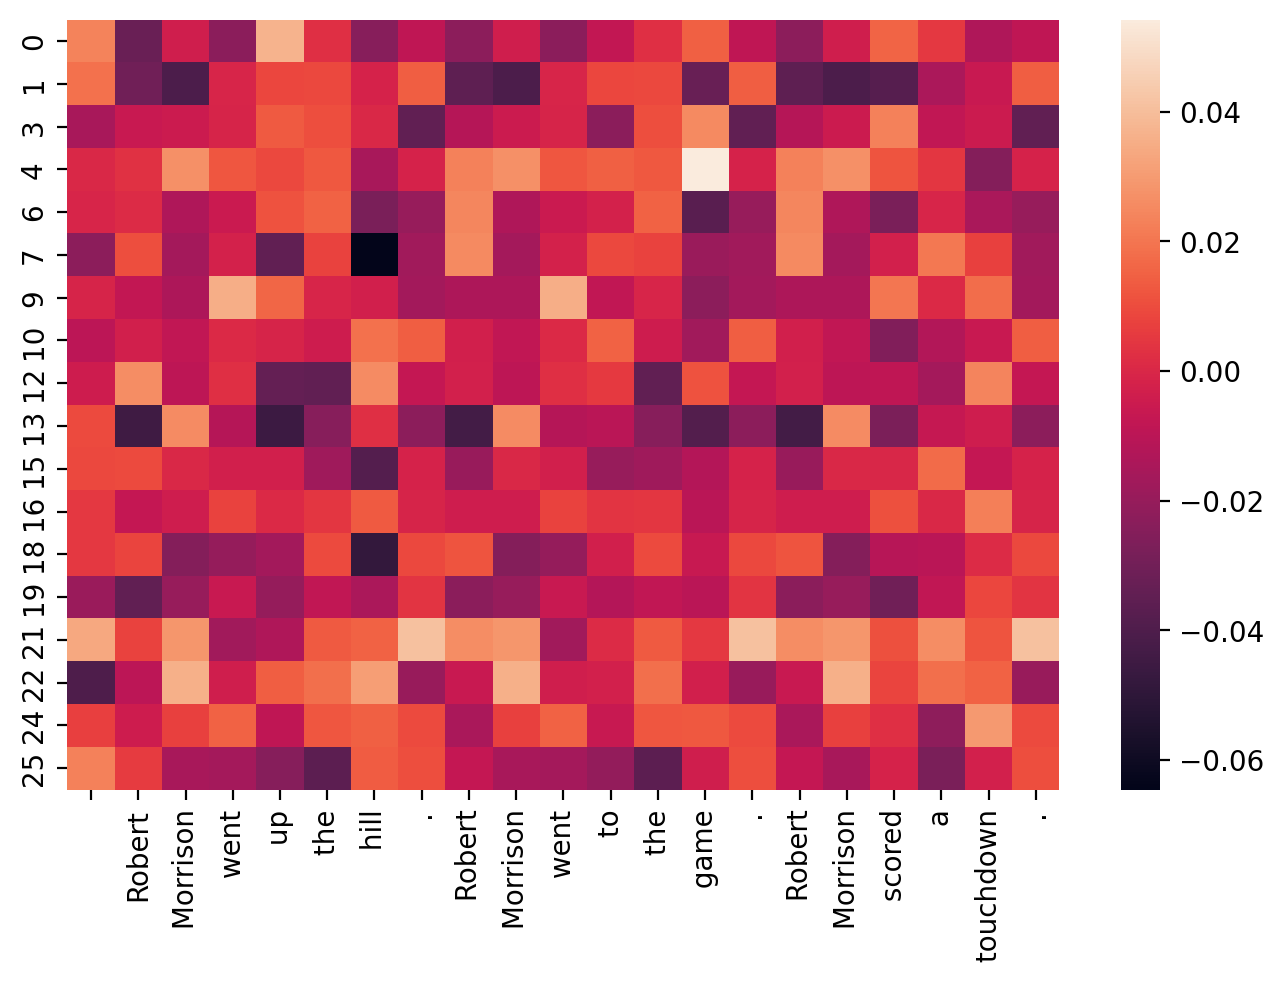

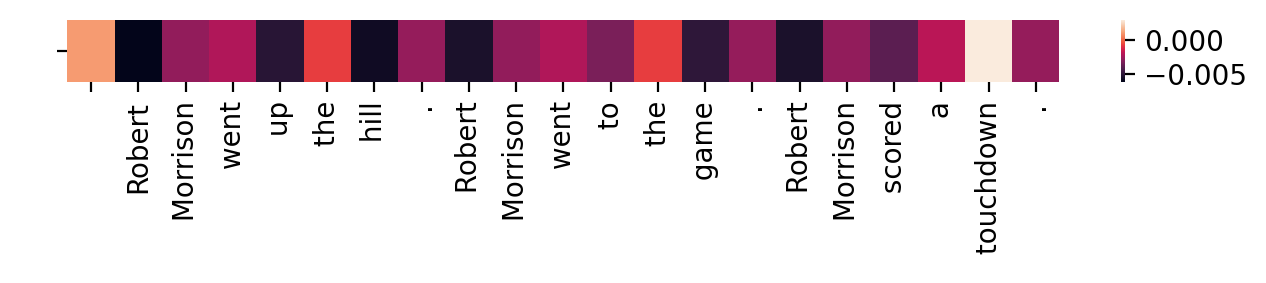

attn =>


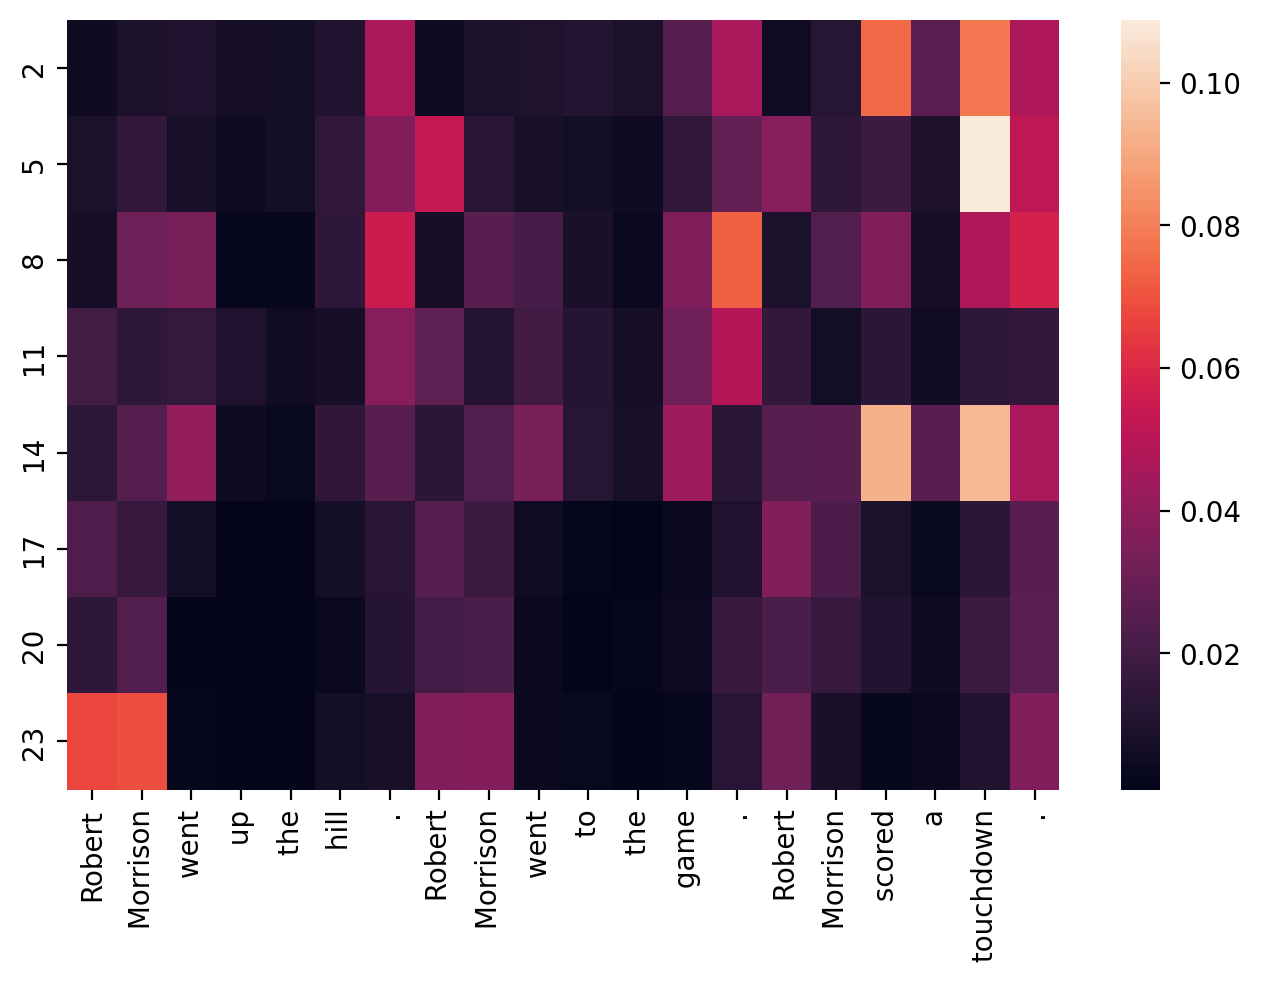

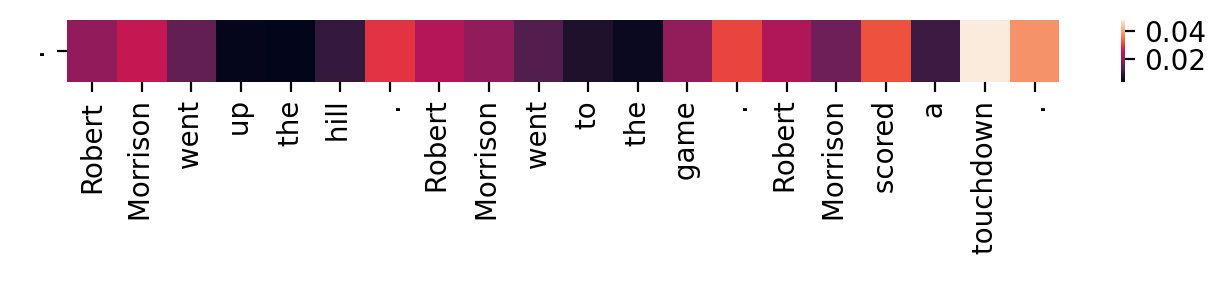


==END==

next_tok= Morrison
recurrence =>


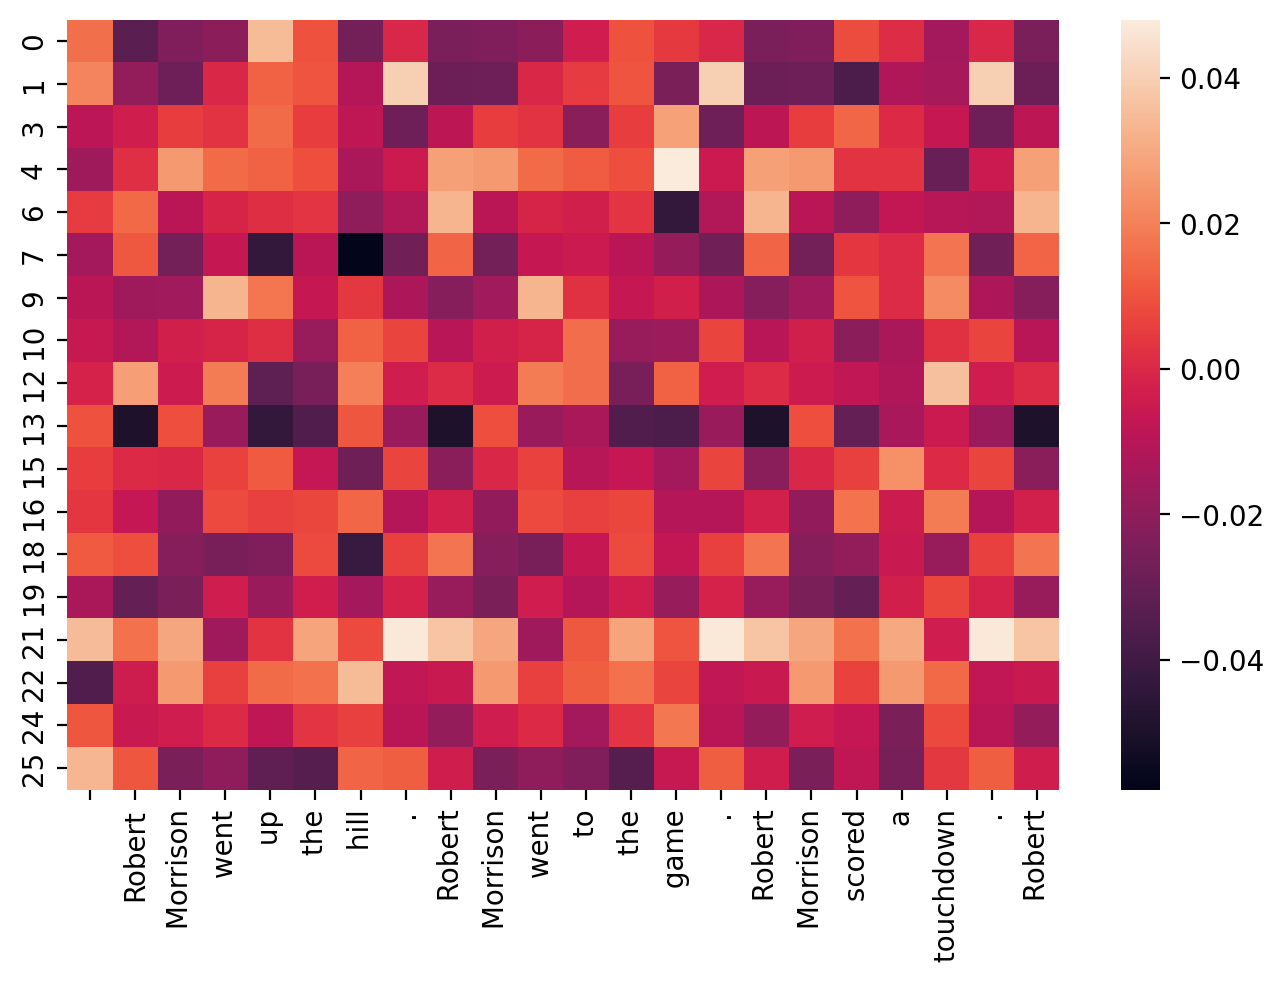

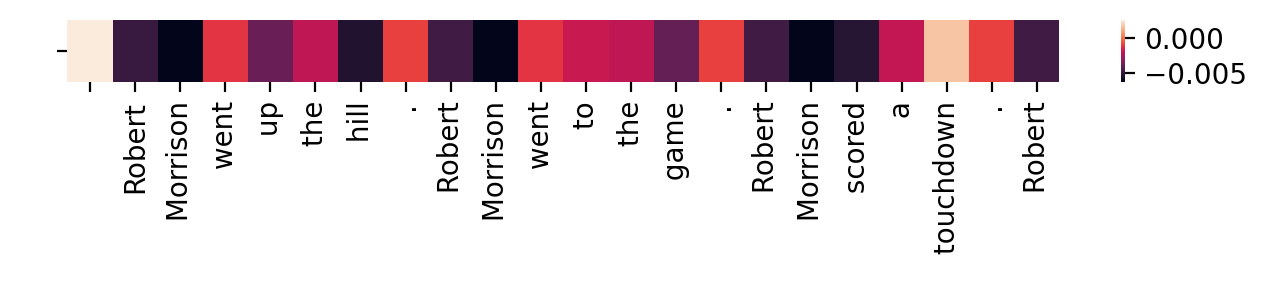

attn =>


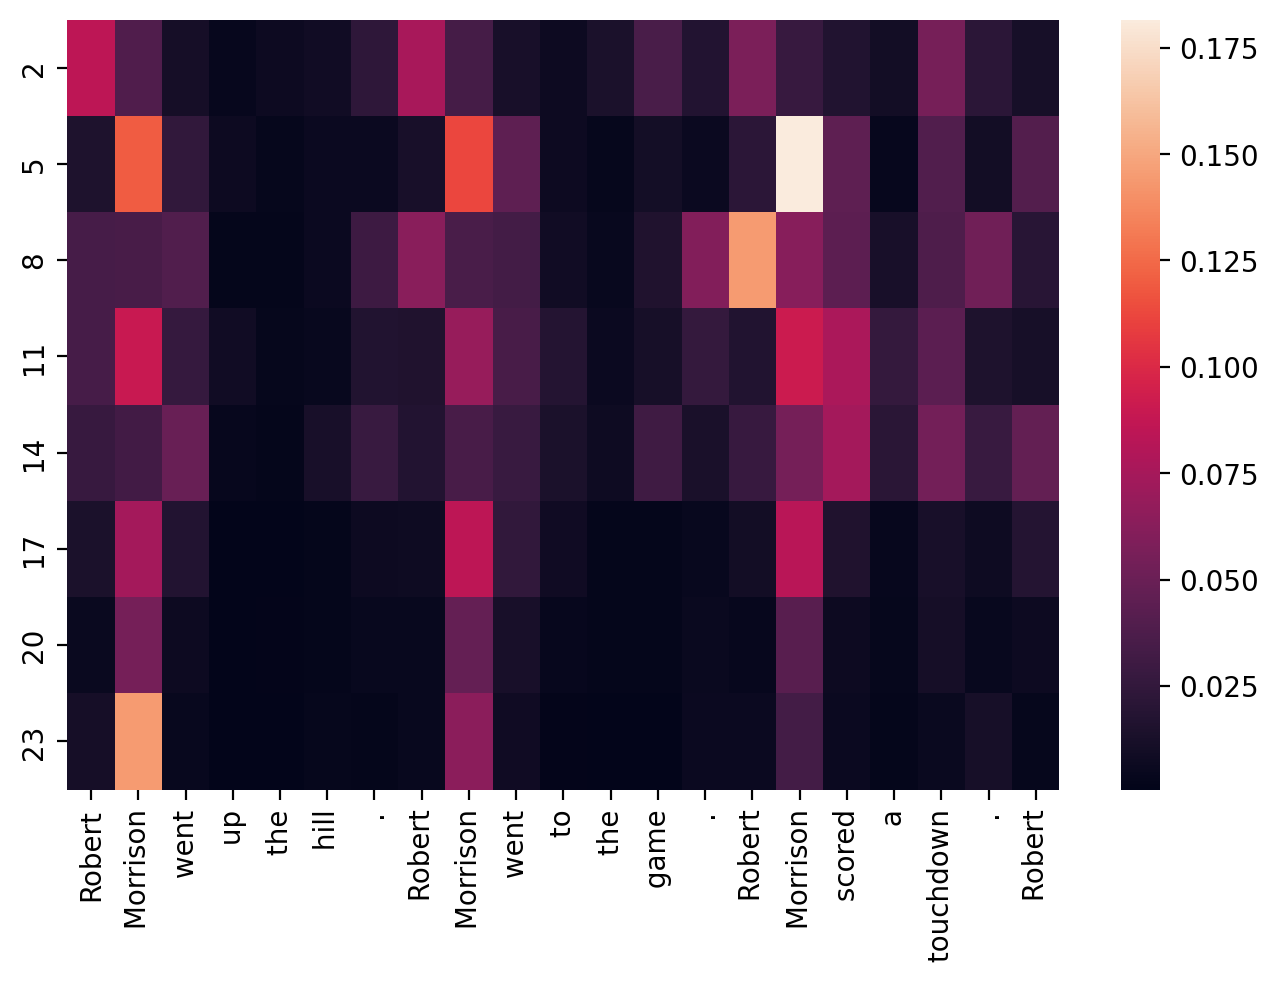

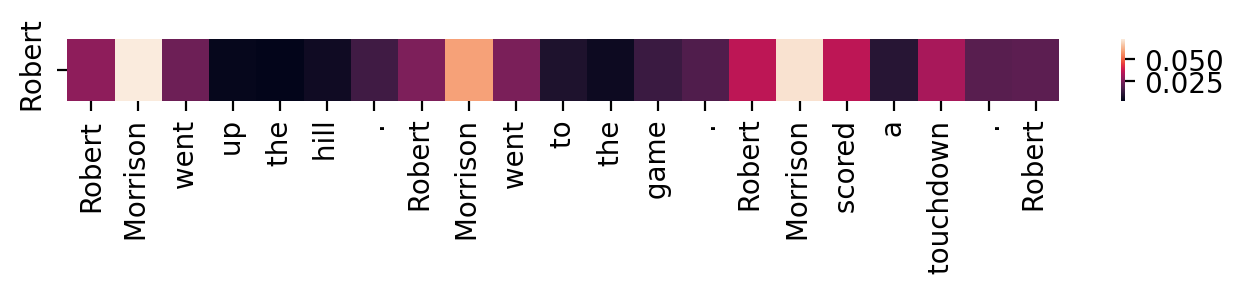


==END==

next_tok= returned
recurrence =>


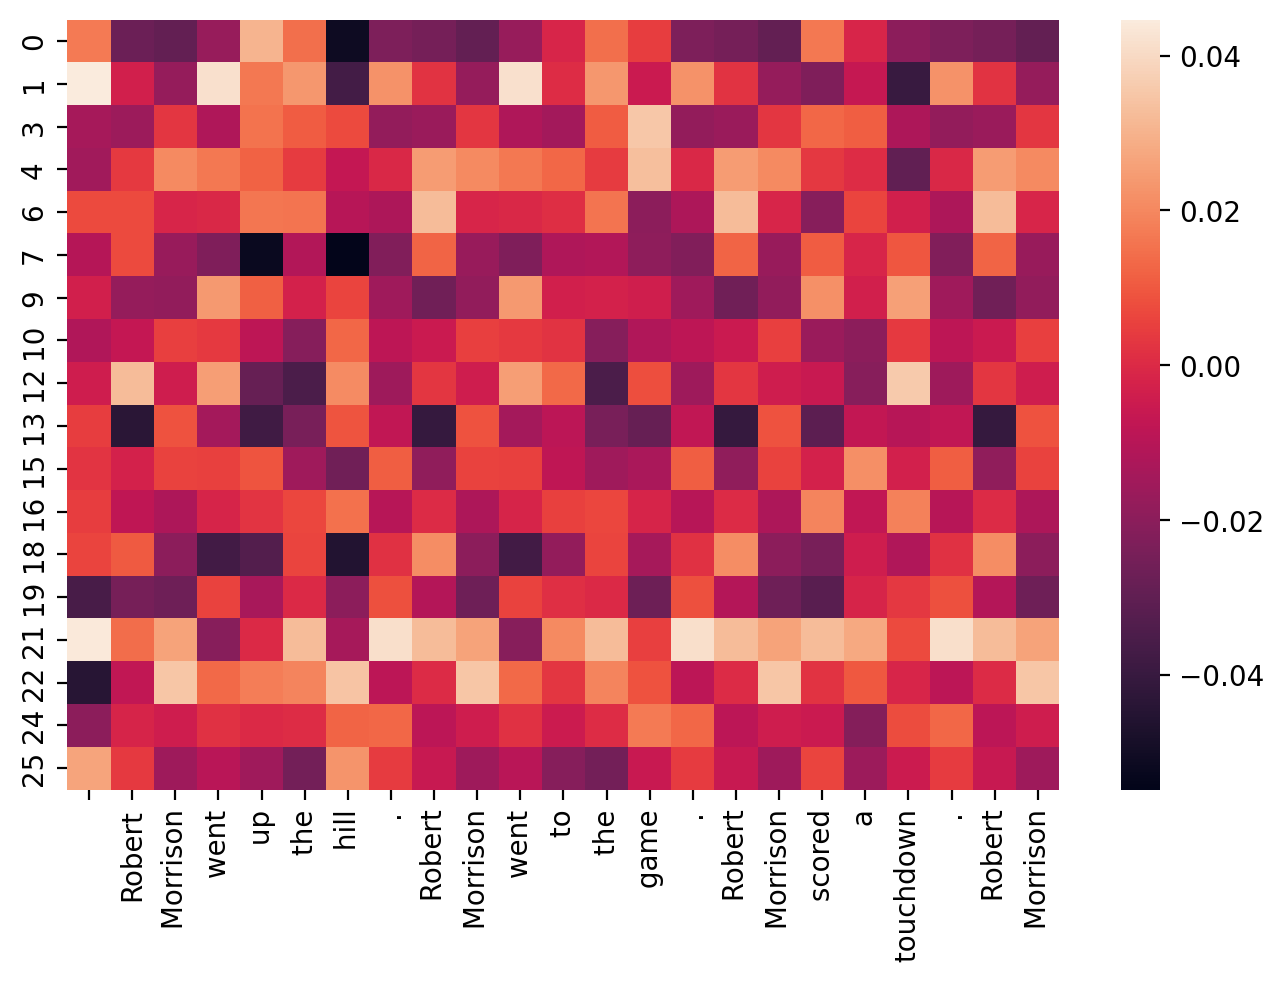

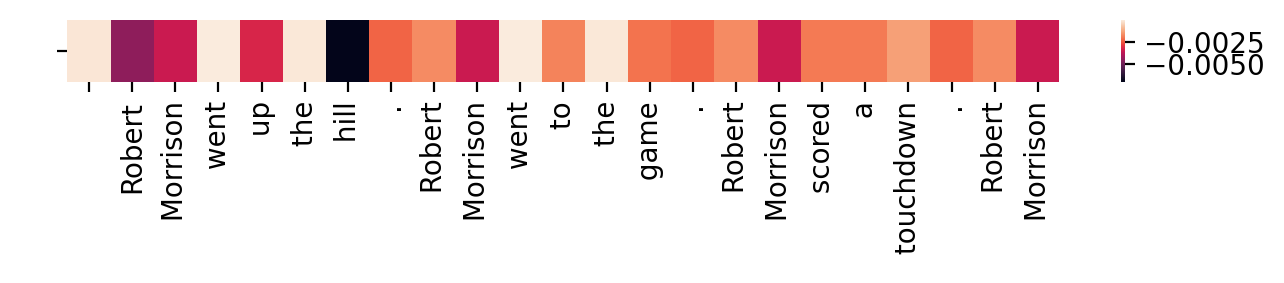

attn =>


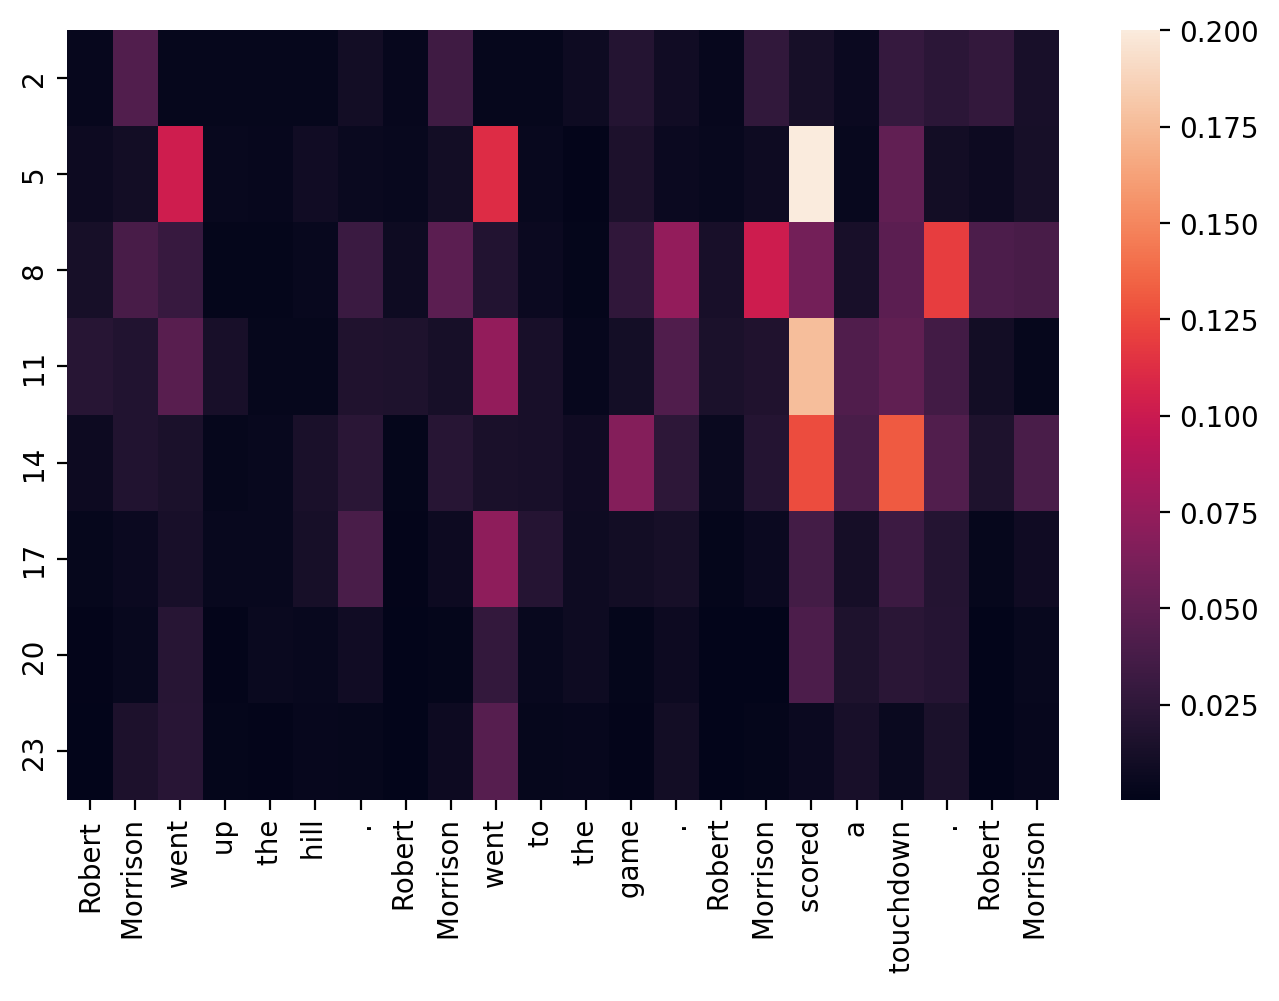

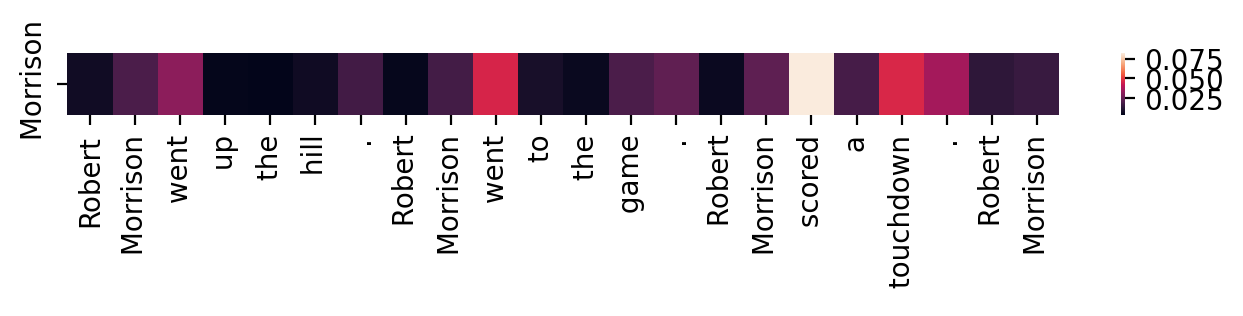


==END==

next_tok= the
recurrence =>


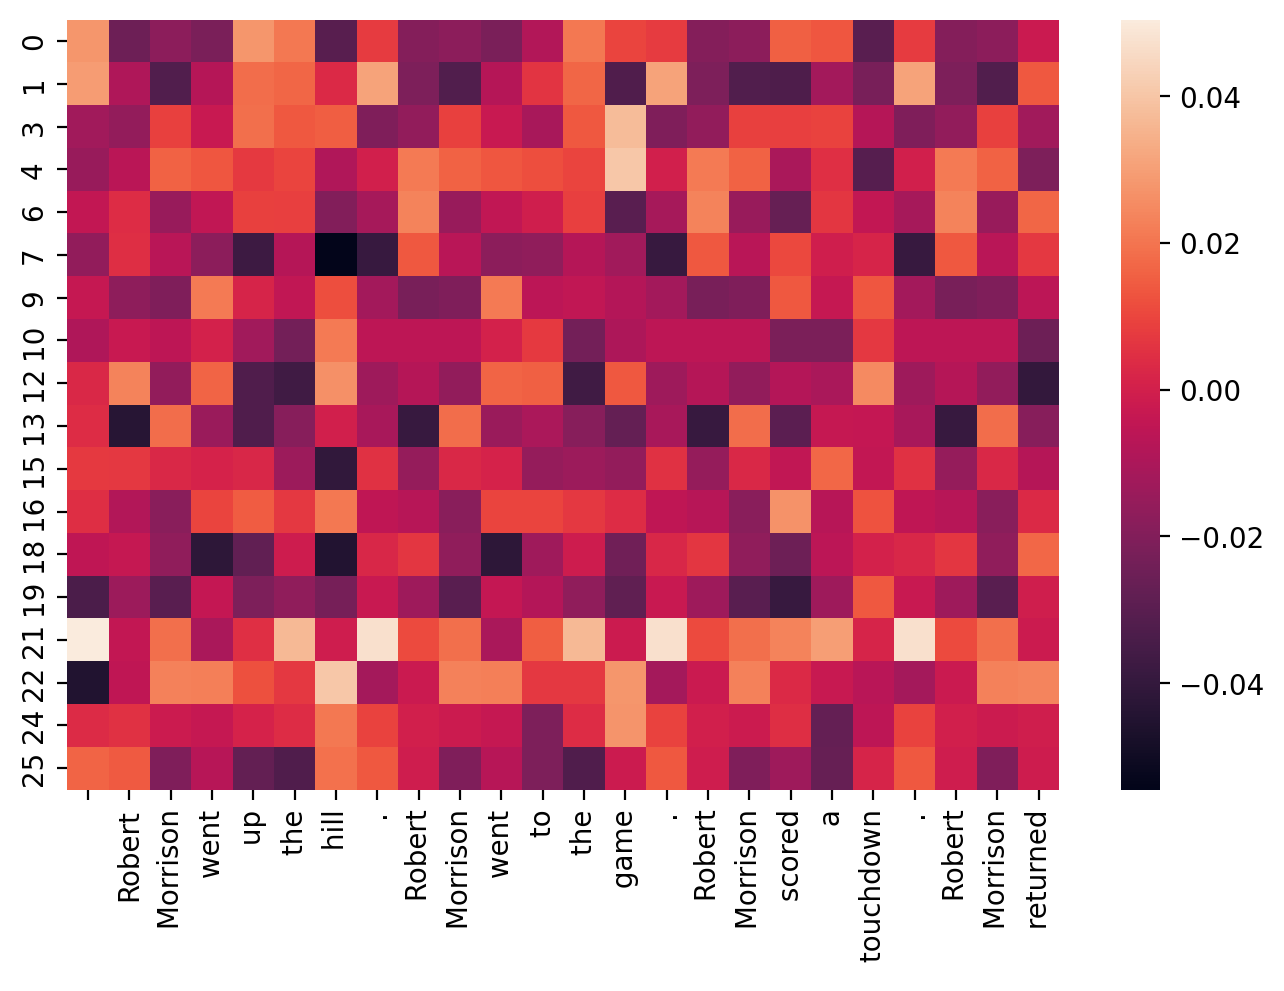

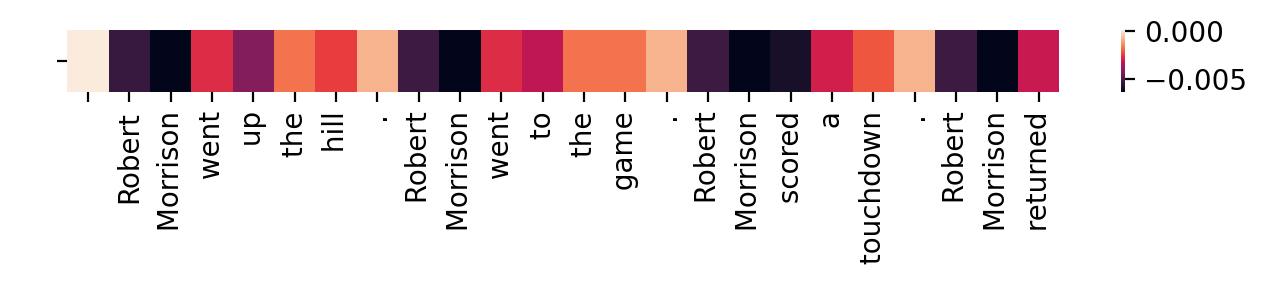

attn =>


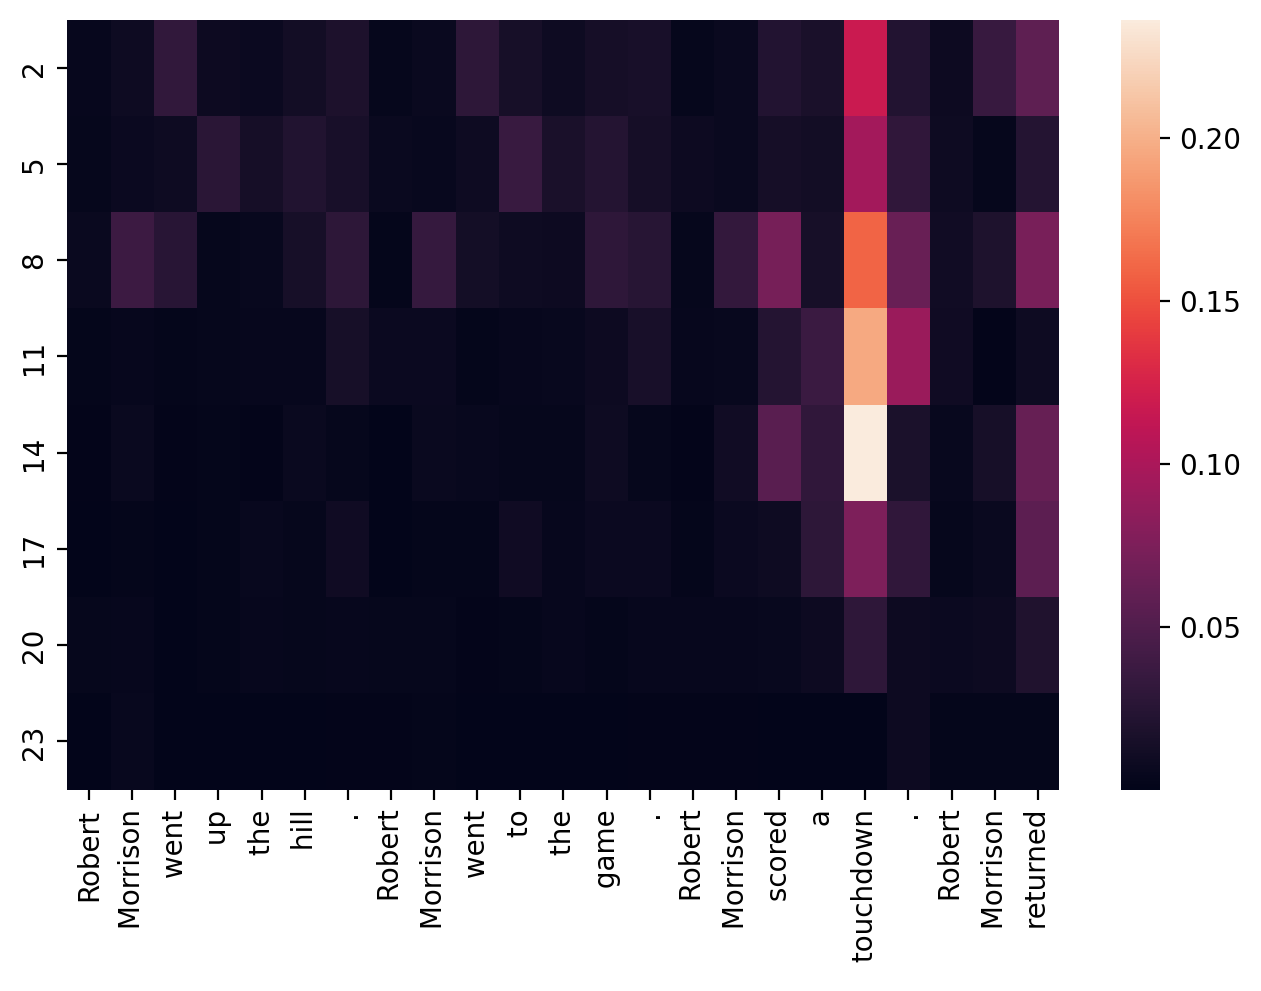

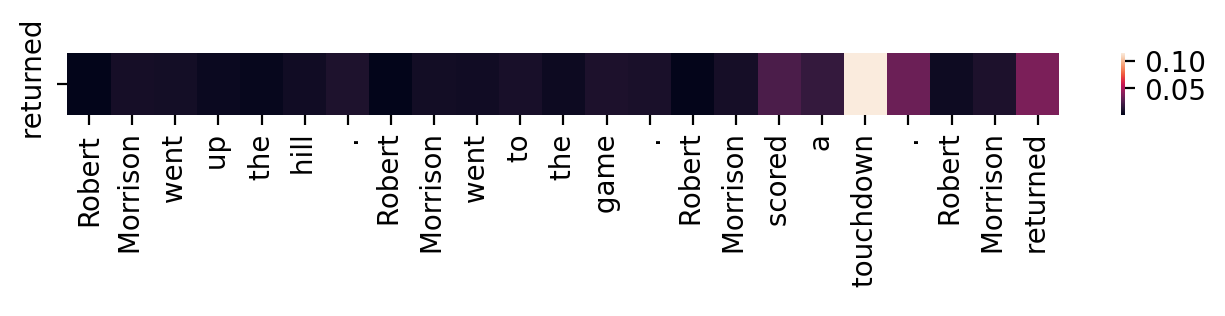


==END==

next_tok= ensuing
recurrence =>


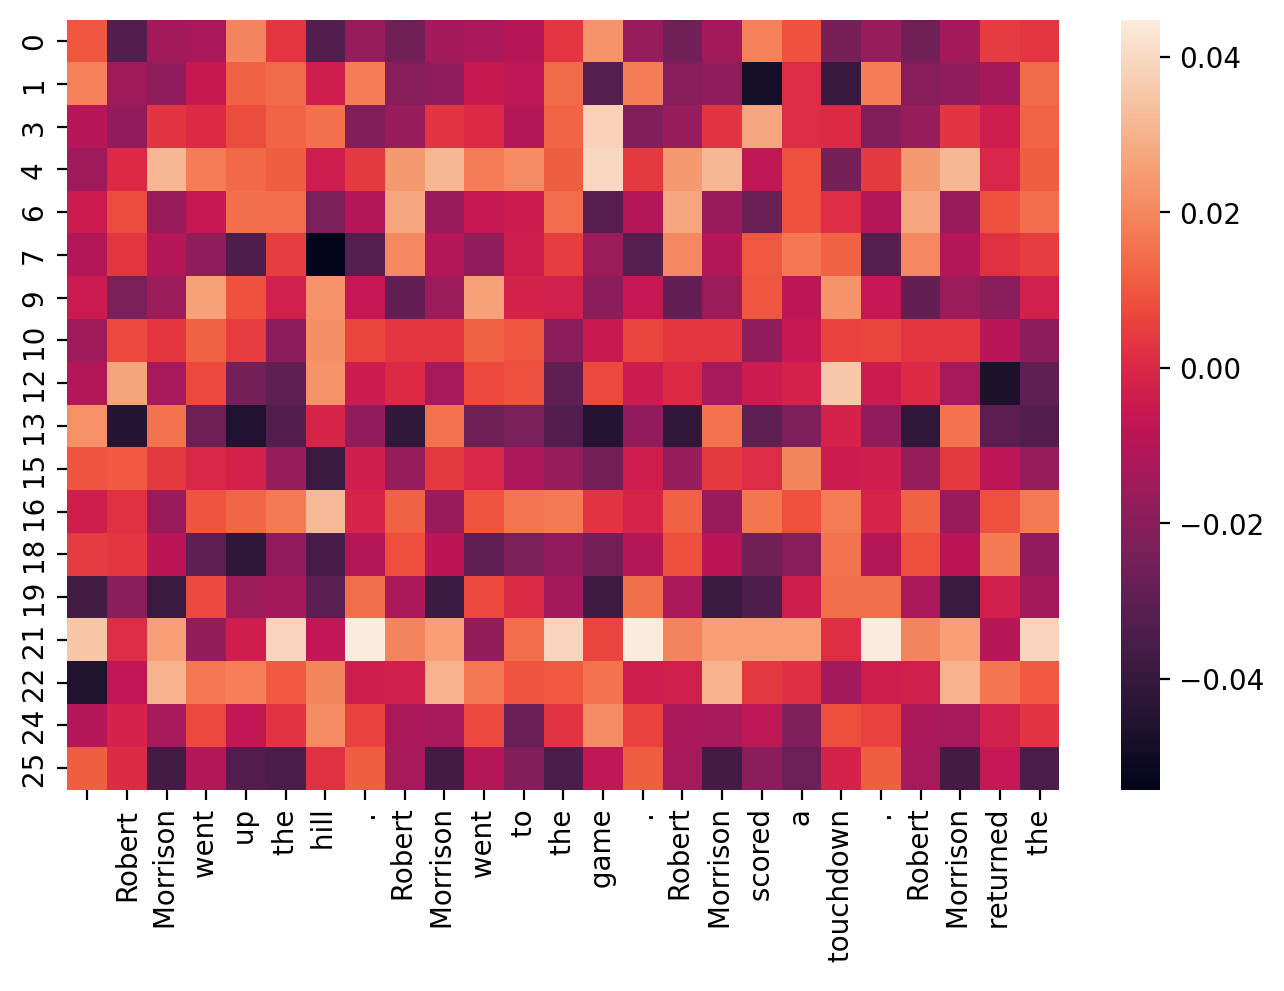

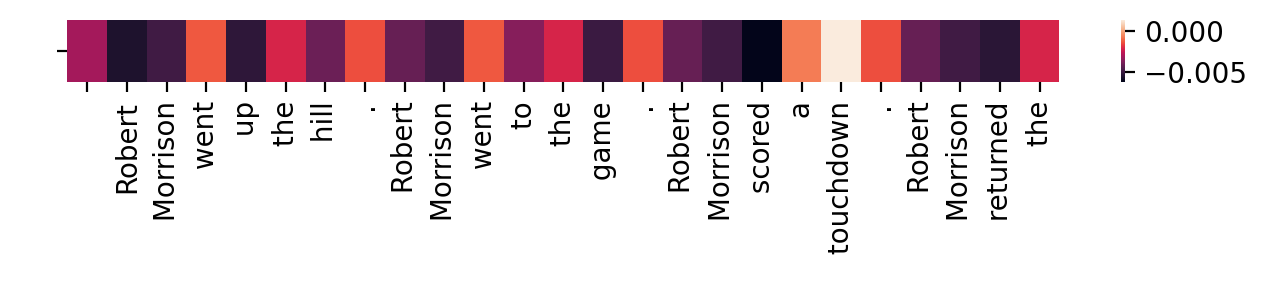

attn =>


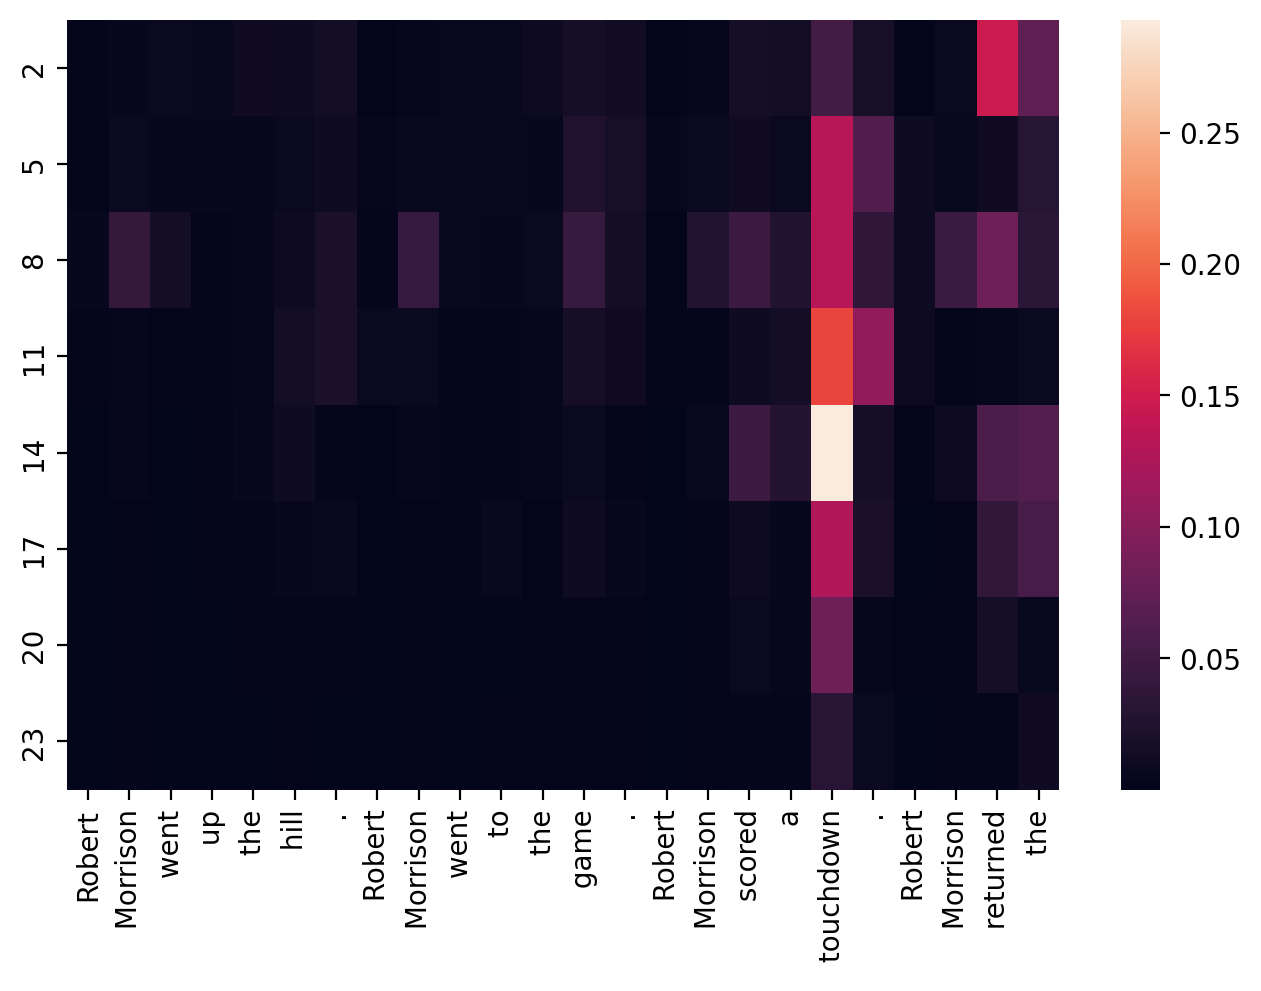

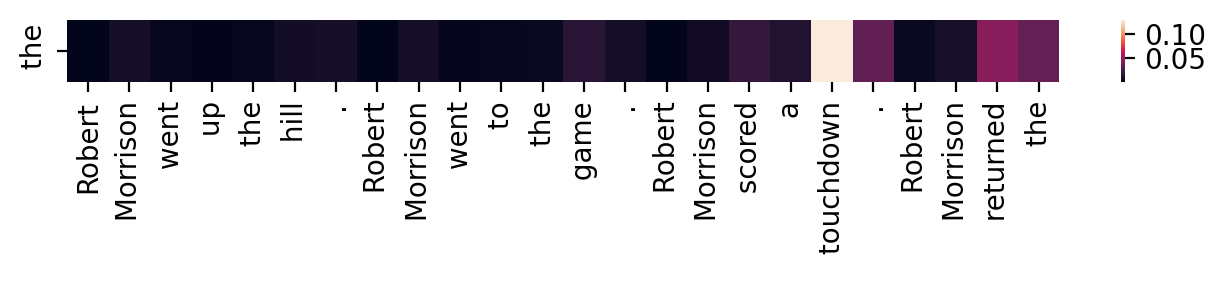


==END==

next_tok= kickoff
recurrence =>


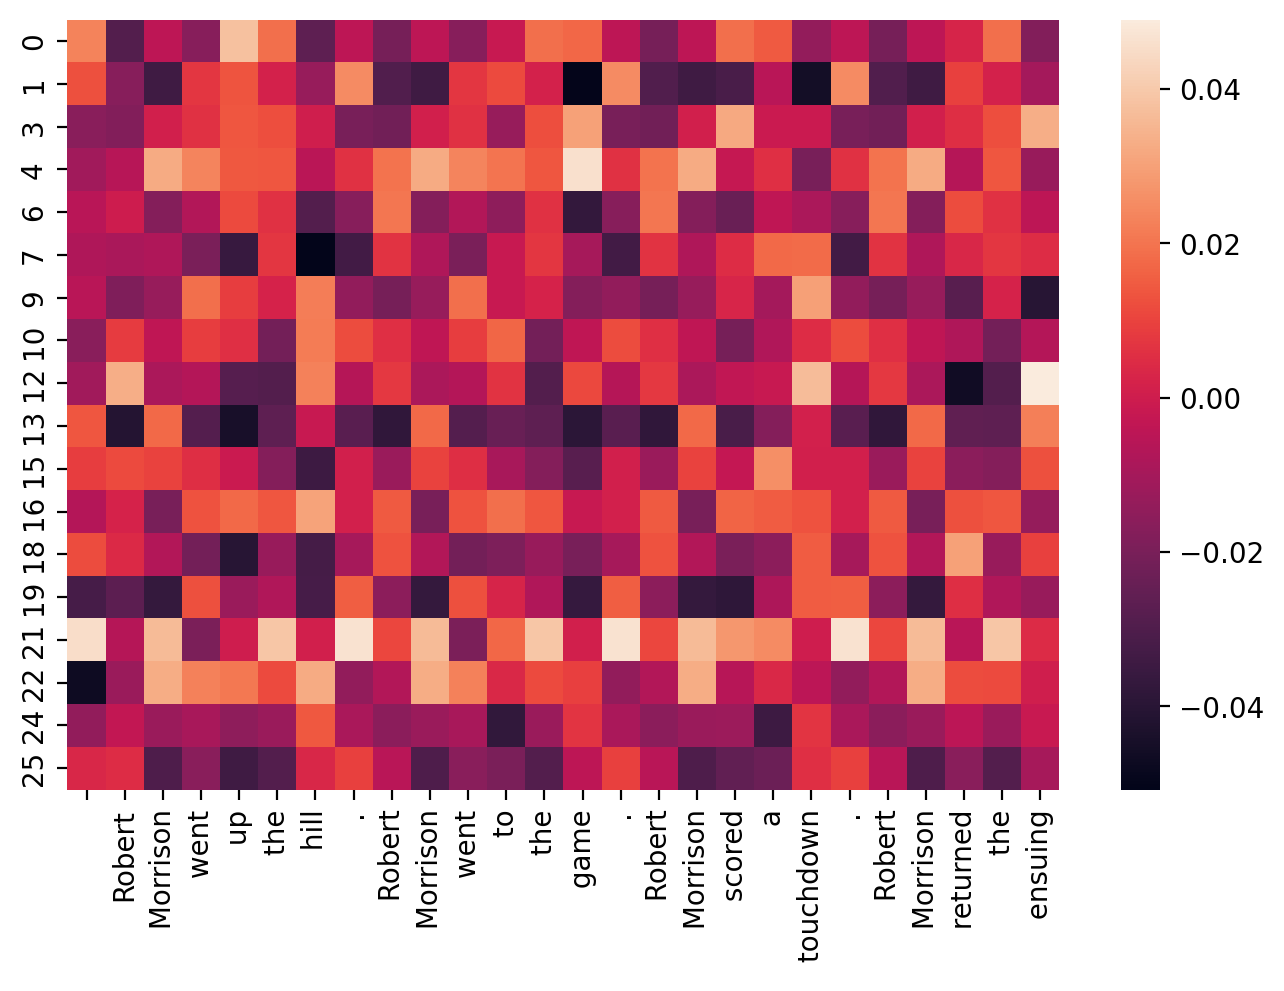

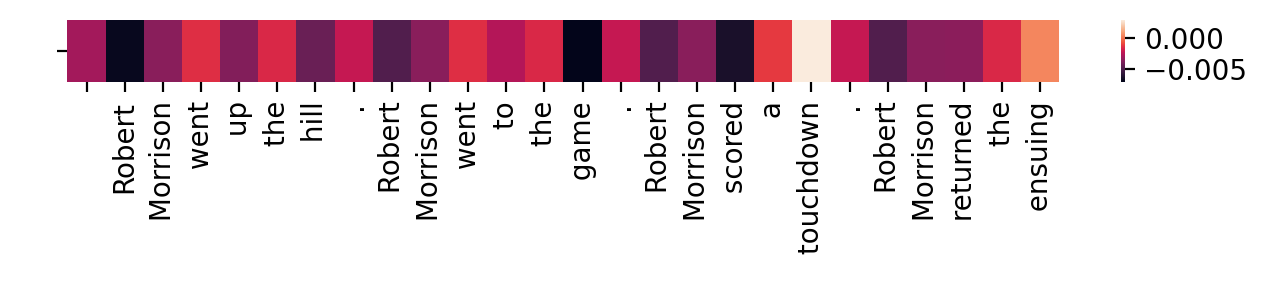

attn =>


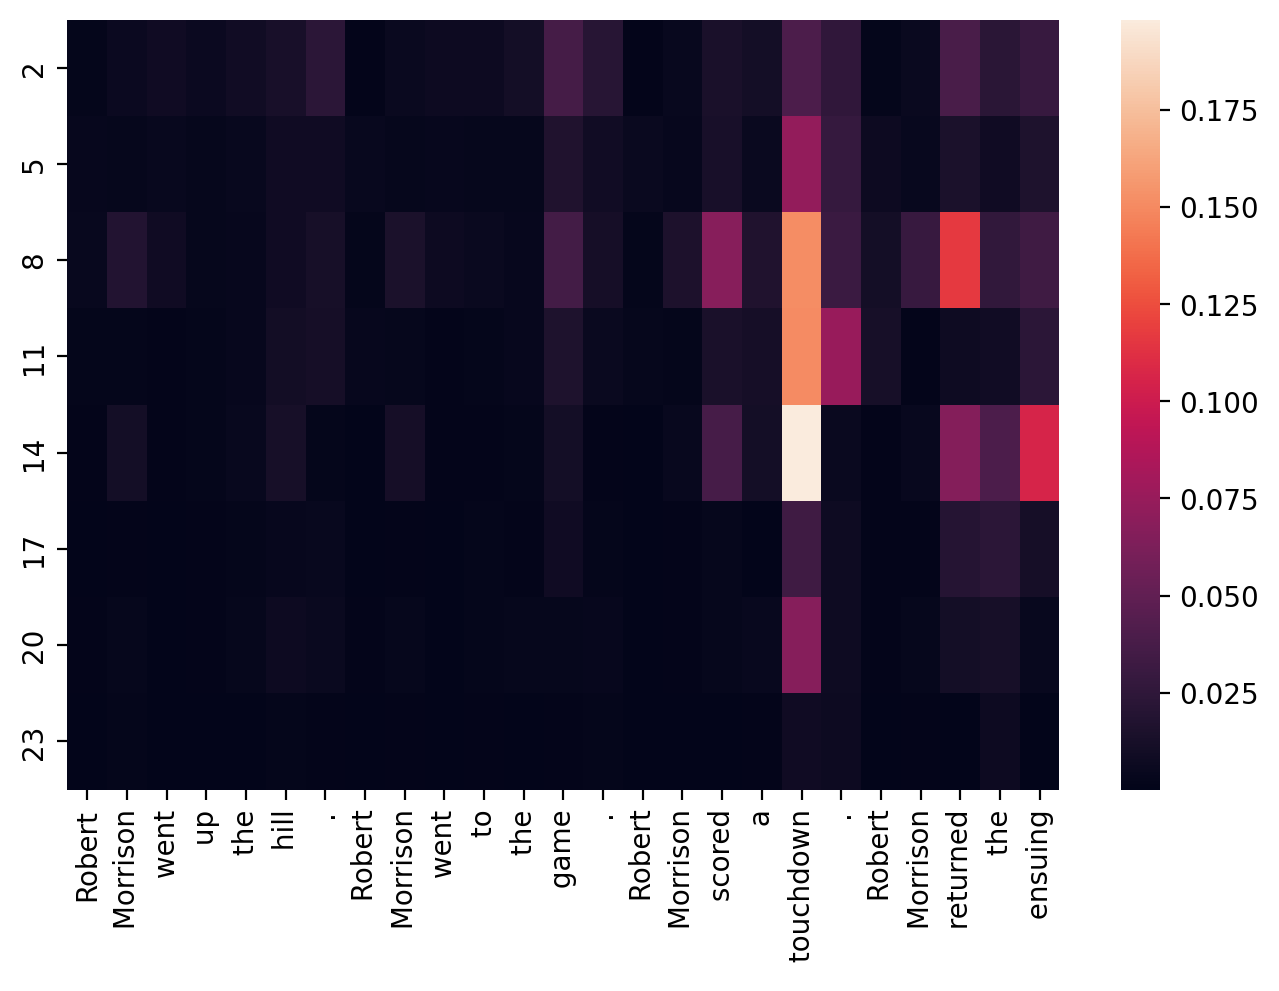

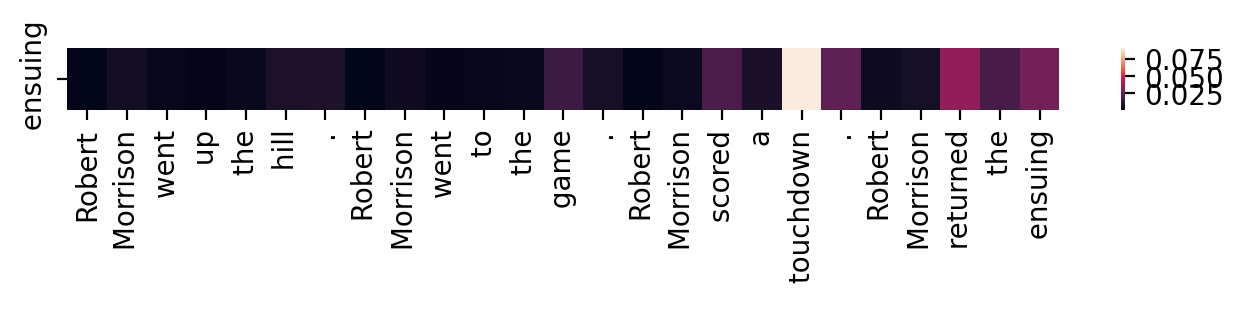


==END==

Prompt:
Robert Morrison went up the hill. Robert Morrison went to the game. Robert
Output:
 Morrison scored a touchdown. Robert Morrison returned the ensuing
##########


In [9]:
input_batch = [
  "Robert Morrison went up the hill. Robert Morrison went to the game. Robert",
]
out_data = sampler(input_strings=input_batch, total_generation_steps=10)

for input_string, out_string in zip(input_batch, out_data.text):
  print(f"Prompt:\n{input_string}\nOutput:\n{out_string}")
  print(10*'#')